In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:

df = pd.read_csv("Rose.csv")

In [3]:
df.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [4]:
df.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [5]:
df.shape

(187, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


<Figure size 1296x576 with 0 Axes>

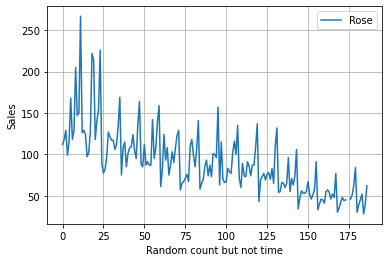

In [7]:
plt.figure(figsize = (18, 8))
df.plot();
plt.xlabel('Random count but not time')
plt.ylabel('Sales')
plt.grid()

In [8]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [9]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [10]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df.head()
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YearMonth   187 non-null    object        
 1   Rose        185 non-null    float64       
 2   Time_Stamp  187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.5+ KB


Text(0, 0.5, 'Sales')

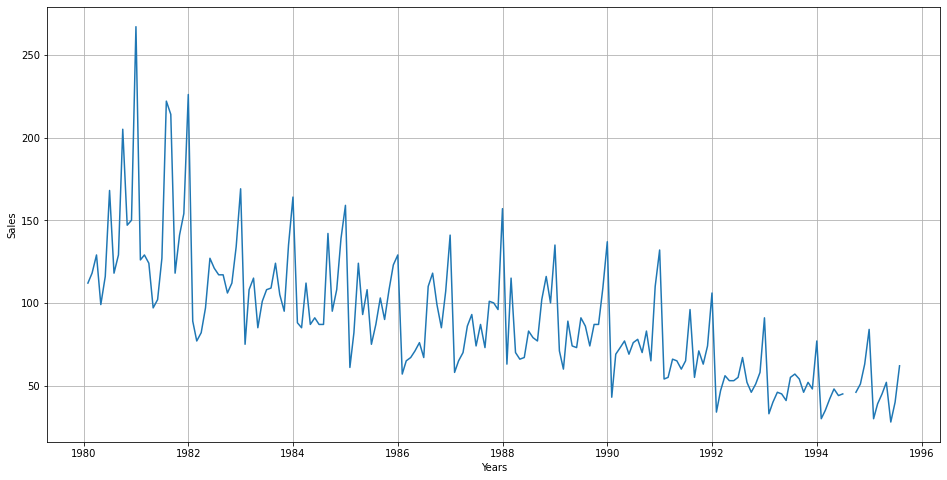

In [11]:
plt.figure(figsize=(16,8))
plt.plot(df['Time_Stamp'],df['Rose']);
plt.grid()
plt.xlabel('Years')
plt.ylabel('Sales')

In [12]:
df.describe().T

count       mean        std   min   25%   50%    75%    max
Rose  185.0  90.394595  39.175344  28.0  63.0  86.0  112.0  267.0

In [13]:
df.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YearMonth   187 non-null    object        
 1   Rose        185 non-null    float64       
 2   Time_Stamp  187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.5+ KB


In [15]:
df.set_index(keys = 'Time_Stamp', drop=True, inplace=True)
df.head()

YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0

In [16]:
df.drop(labels = 'YearMonth', inplace=True, axis =1)
df.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [17]:
df.isnull().sum()

Rose    2
dtype: int64

In [18]:
df['Rose'].isnull().sum()

2

In [19]:
df['Rose'].interpolate(method='linear', inplace=True)

In [20]:
df.isnull().sum()

Rose    0
dtype: int64

In [21]:
df.tail(15)

Rose
Time_Stamp           
1994-05-31  44.000000
1994-06-30  45.000000
1994-07-31  45.333333
1994-08-31  45.666667
1994-09-30  46.000000
1994-10-31  51.000000
1994-11-30  63.000000
1994-12-31  84.000000
1995-01-31  30.000000
1995-02-28  39.000000
1995-03-31  45.000000
1995-04-30  52.000000
1995-05-31  28.000000
1995-06-30  40.000000
1995-07-31  62.000000

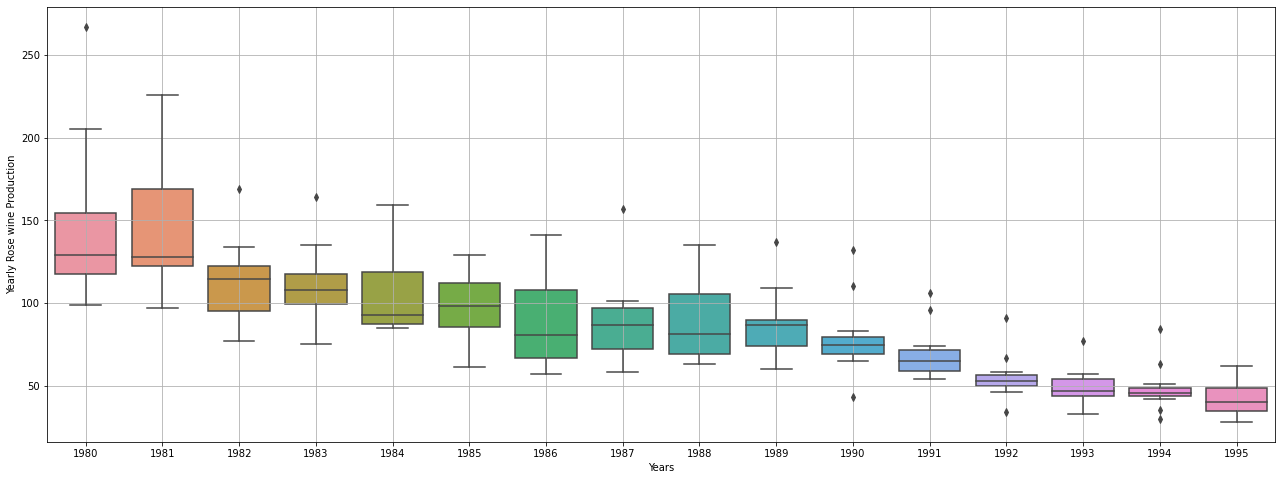

In [22]:
fig, ax =plt.subplots(figsize = (22,8))
sns.boxplot(x=df.index.year,y=df['Rose'])
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Rose wine Production');

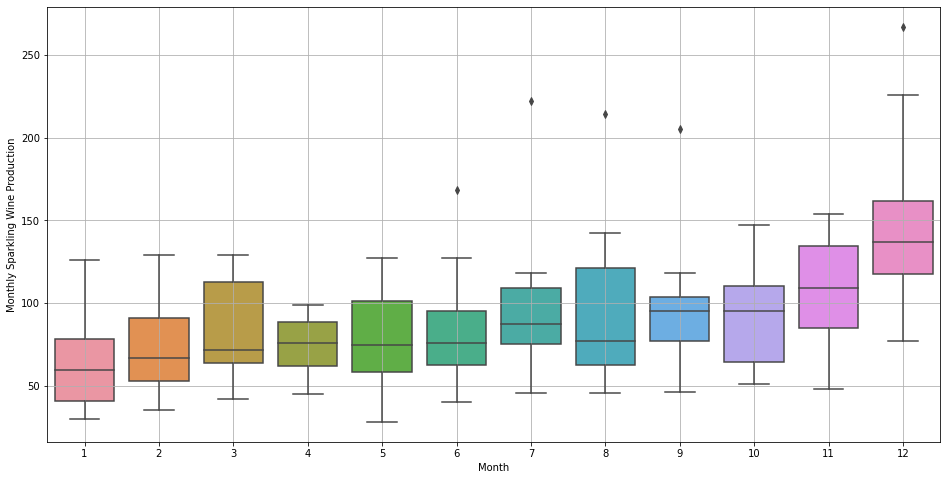

In [23]:
#fig, ax =plt.subplots(figsize = (22,8))
#fig,  =plt.subplots(figsize = (22,8))
plt.figure(figsize=(16,8))
sns.boxplot(x=df.index.month,y=df['Rose'])
#sns.boxplot(df.index.month, df, ax=ax, whis=1.5)
plt.grid();
plt.xlabel('Month');
plt.ylabel('Monthly Sparkling Wine Production');

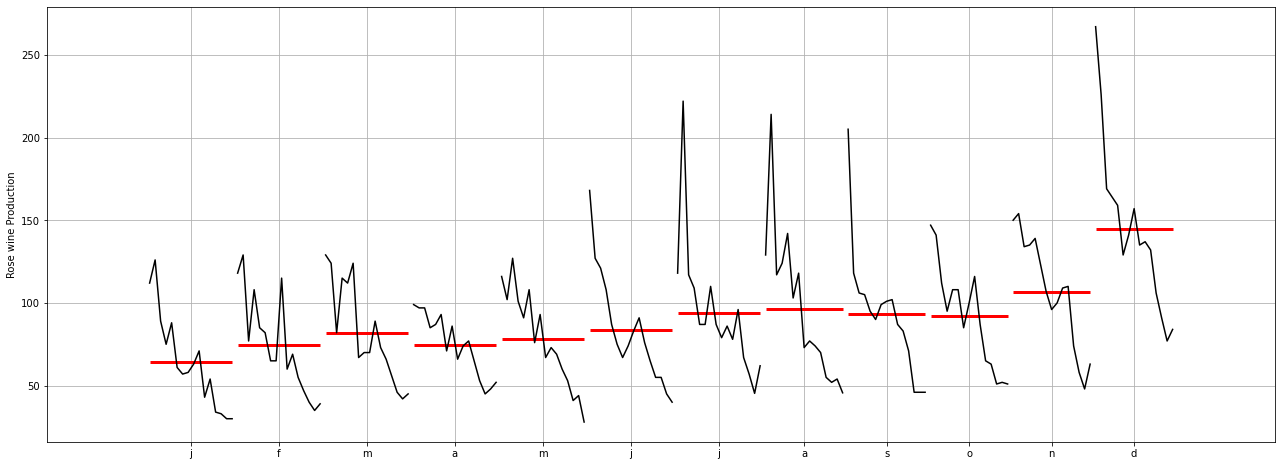

In [24]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize = (22,8))
month_plot(df, ylabel = 'Rose wine Production', ax=ax)
plt.grid();

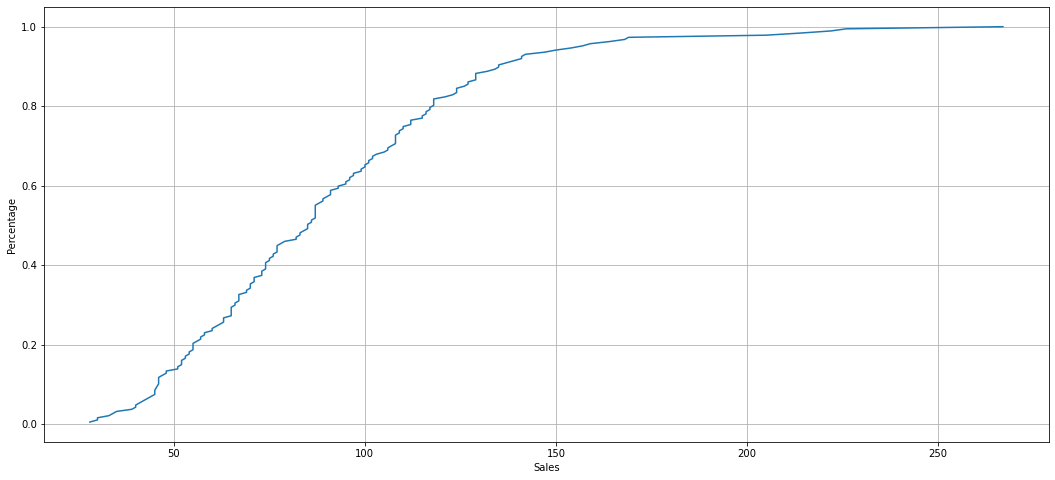

In [25]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.ylabel('Percentage')
plt.xlabel('Sales');

Text(0, 0.5, 'Percentage')

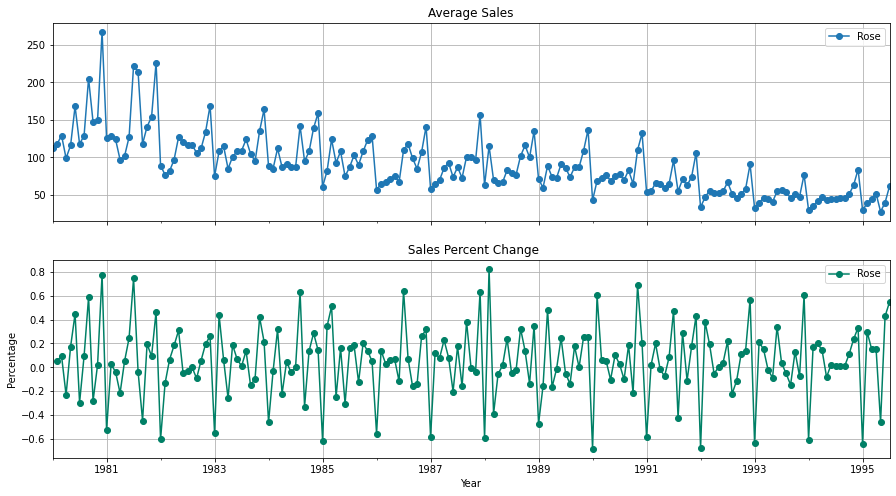

In [26]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)

ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
plt.ylabel('Sale')
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title=" Sales Percent Change",grid=True)
plt.xlabel('Year')
plt.ylabel('Percentage')

In [27]:
yearly_sales_across_months = pd.pivot_table(df, values = 'Rose', columns=df.index.month, index =df.index.year)
yearly_sales_across_months

Time_Stamp     1      2      3     4      5      6           7           8   \
Time_Stamp                                                                    
1980        112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981        126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982         89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983         75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984         88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985         61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986         57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987         58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988         63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989         71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990         43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991         54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992         34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993         33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994         30.0   35.0   42.0  48.0   44.0   45.0   45.333333   45.666667   
1995         30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

Time_Stamp     9      10     11     12  
Time_Stamp                              
1980        205.0  147.0  150.0  267.0  
1981        118.0  141.0  154.0  226.0  
1982        106.0  112.0  134.0  169.0  
1983        105.0   95.0  135.0  164.0  
1984         95.0  108.0  139.0  159.0  
1985         90.0  108.0  123.0  129.0  
1986         99.0   85.0  107.0  141.0  
1987        101.0  100.0   96.0  157.0  
1988        102.0  116.0  100.0  135.0  
1989         87.0   87.0  109.0  137.0  
1990         83.0   65.0  110.0  132.0  
1991         71.0   63.0   74.0  106.0  
1992         46.0   51.0   58.0   91.0  
1993         46.0   52.0   48.0   77.0  
1994         46.0   51.0   63.0   84.0  
1995          NaN    NaN    NaN    NaN

In [28]:
df.isna().sum()

Rose    0
dtype: int64

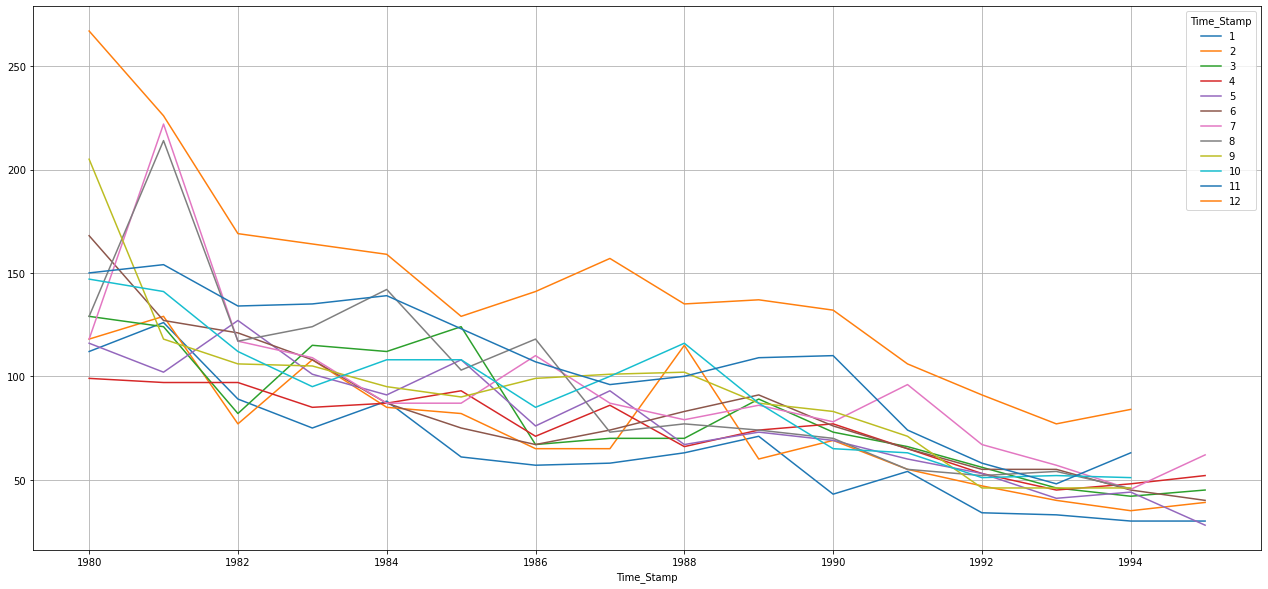

In [29]:
fig, ax = plt.subplots(figsize = (22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

In [30]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

Rose
Time_Stamp        
1980-12-31  1758.0
1981-12-31  1780.0
1982-12-31  1348.0
1983-12-31  1324.0
1984-12-31  1280.0

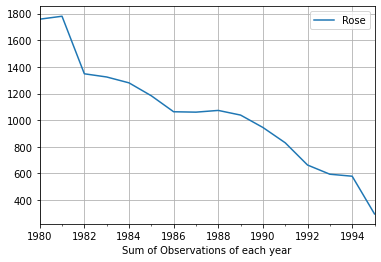

In [31]:
df_yearly_sum.plot();
plt.grid();
plt.xlabel('Sum of Observations of each year');

In [32]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean.head()

Rose
Time_Stamp            
1980-12-31  146.500000
1981-12-31  148.333333
1982-12-31  112.333333
1983-12-31  110.333333
1984-12-31  106.666667

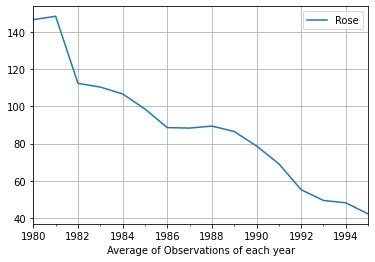

In [33]:
df_yearly_mean.plot();
plt.grid();
plt.xlabel('Average of Observations of each year');

In [34]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()

Rose
Time_Stamp       
1980-03-31  359.0
1980-06-30  383.0
1980-09-30  452.0
1980-12-31  564.0
1981-03-31  379.0

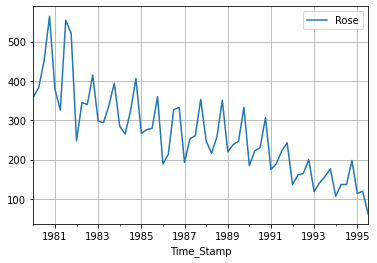

In [35]:
df_quarterly_sum.plot();
plt.grid()

In [36]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

Rose
Time_Stamp            
1980-03-31  119.666667
1980-06-30  127.666667
1980-09-30  150.666667
1980-12-31  188.000000
1981-03-31  126.333333

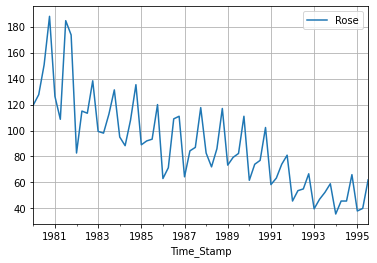

In [37]:
df_quarterly_mean.plot();
plt.grid()

In [38]:
df_daily_sum = df.resample('D').sum()
df_daily_sum.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-01    0.0
1980-02-02    0.0
1980-02-03    0.0
1980-02-04    0.0

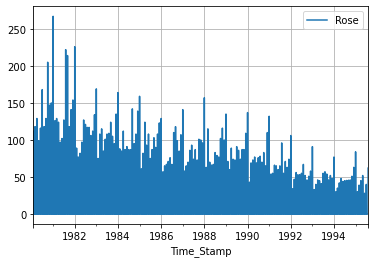

In [39]:
df_daily_sum.plot()
plt.grid();

In [40]:
df_decade_sum = df.resample('10Y').sum()
df_decade_sum.head()

Rose
Time_Stamp         
1980-12-31   1758.0
1990-12-31  12094.0
2000-12-31   2962.0

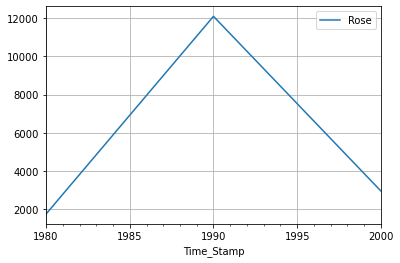

In [41]:
df_decade_sum.plot()
plt.grid();

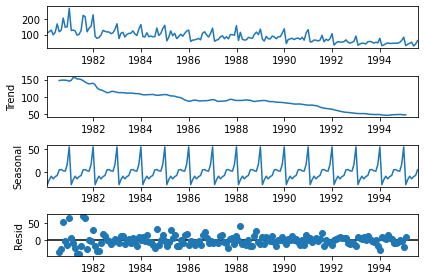

In [42]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, model = 'additive')
decomposition.plot();


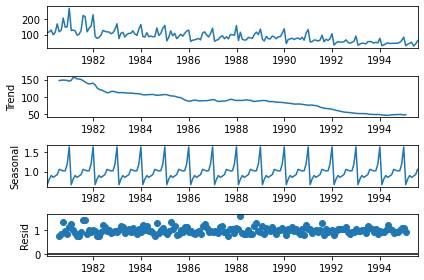

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, model = 'multiplicative')
decomposition.plot();

In [44]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.tail(12),'\n')
print('Seasonality','\n',seasonality.tail(12),'\n')
print('Residual','\n',residual.tail(12),'\n')

Trend 
 Time_Stamp
1994-08-31    48.416667
1994-09-30    48.708333
1994-10-31    49.000000
1994-11-30    48.500000
1994-12-31    47.625000
1995-01-31    48.111111
1995-02-28          NaN
1995-03-31          NaN
1995-04-30          NaN
1995-05-31          NaN
1995-06-30          NaN
1995-07-31          NaN
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1994-08-31    1.035881
1994-09-30    1.017648
1994-10-31    1.022573
1994-11-30    1.192349
1994-12-31    1.628646
1995-01-31    0.670111
1995-02-28    0.806163
1995-03-31    0.901164
1995-04-30    0.854024
1995-05-31    0.889415
1995-06-30    0.923985
1995-07-31    1.058038
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1994-08-31    0.910531
1994-09-30    0.928019
1994-10-31    1.017840
1994-11-30    1.089421
1994-12-31    1.082973
1995-01-31    0.930527
1995-02-28         NaN
1995-03-31         NaN
1995-04-30         NaN
1995-05-31         NaN
1995-06-30         NaN
1995-07-31         NaN
Name: resid, dtype: float64 



In [45]:
Seasonal_Ind = pd.DataFrame({'Jan':round(decomposition.seasonal.head(12),2).values[0], 
                             'Feb':round(decomposition.seasonal.head(12),2).values[1], 
                             'Mar':round(decomposition.seasonal.head(12),2).values[2], 
                             'Apr':round(decomposition.seasonal.head(12),2).values[3], 
                             'May':round(decomposition.seasonal.head(12),2).values[4], 
                             'Jun':round(decomposition.seasonal.head(12),2).values[5], 
                             'Jul':round(decomposition.seasonal.head(12),2).values[6], 
                             'Aug':round(decomposition.seasonal.head(12),2).values[7], 
                             'Sep':round(decomposition.seasonal.head(12),2).values[8], 
                             'Oct':round(decomposition.seasonal.head(12),2).values[9], 
                             'Nov':round(decomposition.seasonal.head(12),2).values[10], 
                             'Dec':round(decomposition.seasonal.head(12),2).values[11]}, 
                            index=range(1,2)) 
Seasonal_Ind

Jan   Feb  Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1  0.67  0.81  0.9  0.85  0.89  0.92  1.06  1.04  1.02  1.02  1.19  1.63

#### Split the data into train and test and plot the training and test data.
#### Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [46]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [47]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [48]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Test Data


Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Test Data


Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [49]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


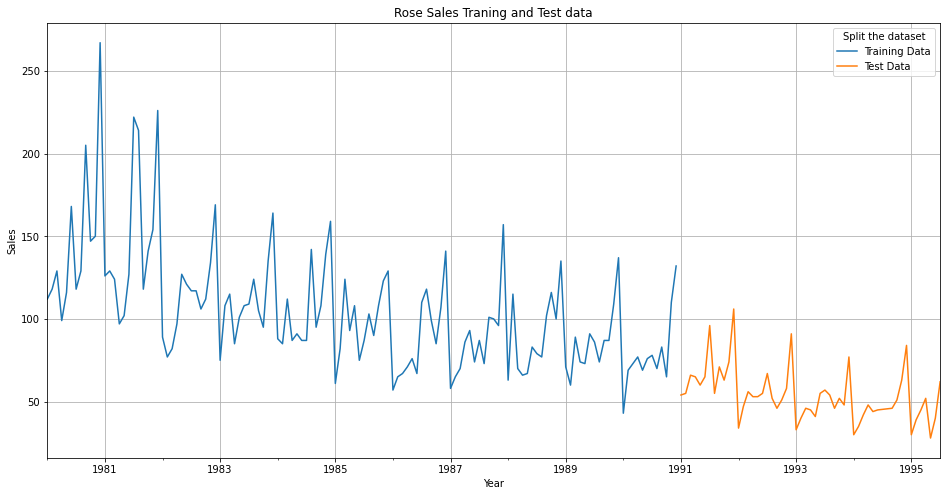

In [50]:
plt.figure(figsize=(16,8))
train['Rose'].plot() 
test['Rose'].plot() 
plt.grid() 
plt.title('Rose Sales Traning and Test data') 
plt.xlabel('Year') 
plt.ylabel('Sales') 
plt.legend(['Training Data','Test Data'],title='Split the dataset');

In [51]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)

print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [52]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [53]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0    43
1991-02-28  55.0    44
1991-03-31  66.0    45
1991-04-30  65.0    46
1991-05-31  60.0    47 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0    93
1995-04-30  52.0    94
1995-05-31  28.0    95
1995-06-30  40.0    96
1995-07-31  62.0    97 



In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lr = LinearRegression()

In [56]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

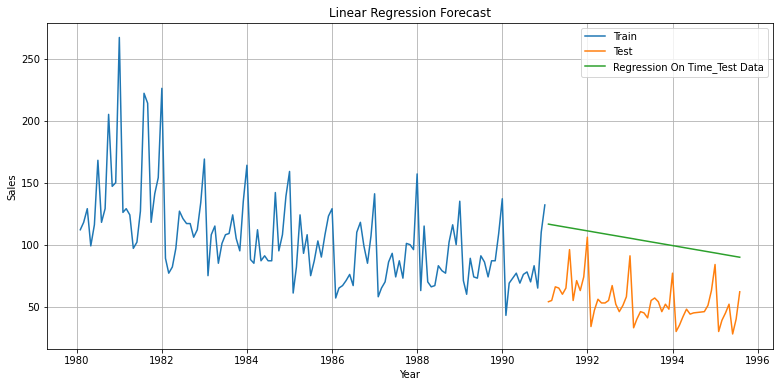

In [57]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.xlabel('Year') 
plt.ylabel('Sales')
plt.title('Linear Regression Forecast')
plt.grid();

In [58]:
from sklearn import metrics

In [59]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 51.433


In [60]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  51.433312

In [61]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [62]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

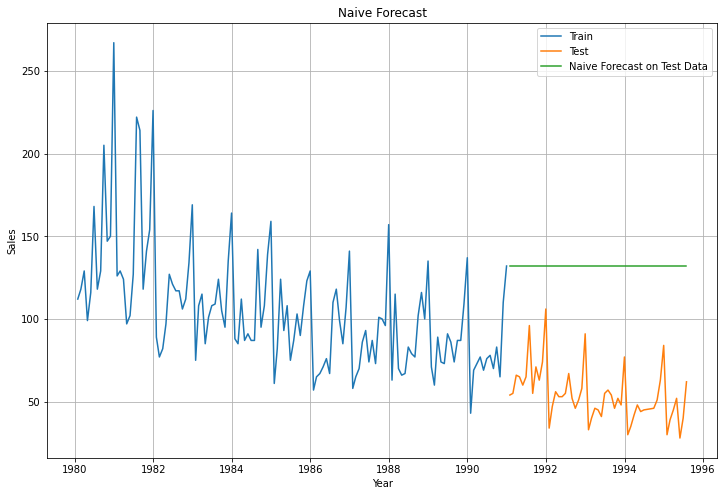

In [63]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.xlabel('Year') 
plt.ylabel('Sales')
plt.grid();

In [64]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


In [65]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  51.433312
NaiveModel        79.718773

In [66]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [67]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
Time_Stamp                     
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

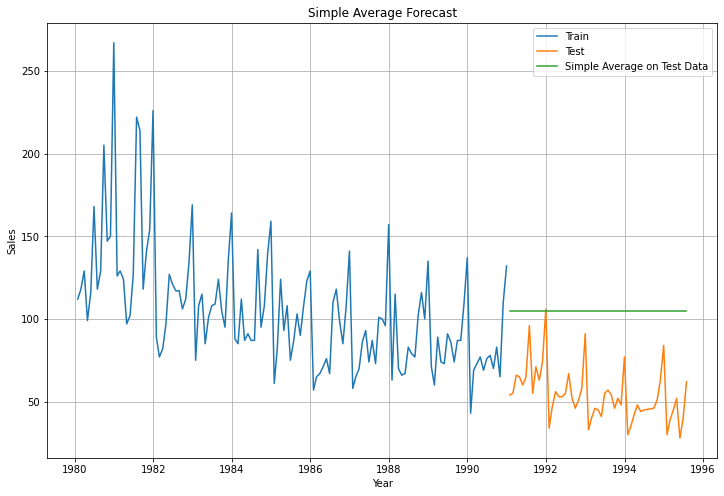

In [68]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.xlabel('Year') 
plt.ylabel('Sales')
plt.grid();

In [69]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [70]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    51.433312
NaiveModel          79.718773
SimpleAverageModel  53.460570

In [71]:
MovingAverage = df.copy()
MovingAverage.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [72]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

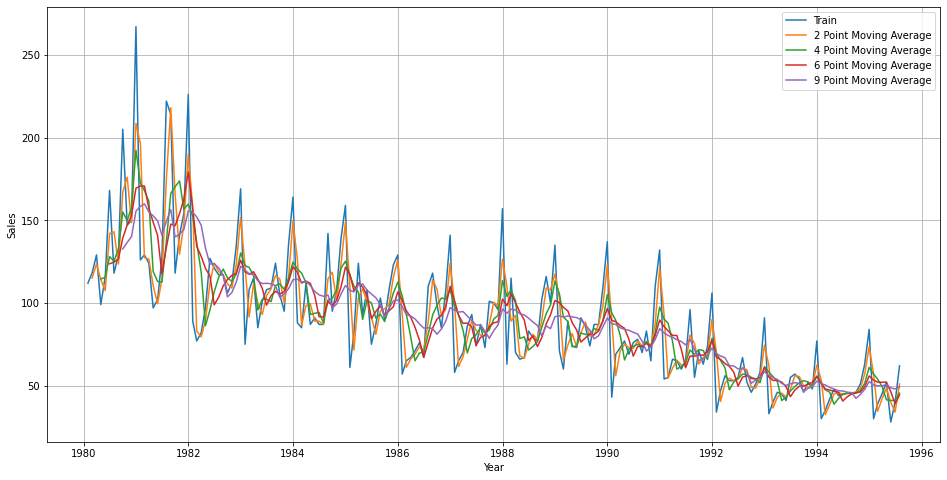

In [73]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.xlabel('Year') 
plt.ylabel('Sales')
plt.grid();

In [74]:
#Creating train and test set 
trailing_MovingAverage_train= MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test= MovingAverage[MovingAverage.index.year >= 1991] 

trailing_MovingAverage_test.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                      
1991-01-31  54.0        93.0       90.25   85.666667   81.888889
1991-02-28  55.0        54.5       87.75   83.166667   80.333333
1991-03-31  66.0        60.5       76.75   80.333333   79.222222
1991-04-30  65.0        65.5       60.00   80.333333   77.777778
1991-05-31  60.0        62.5       61.50   72.000000   76.666667

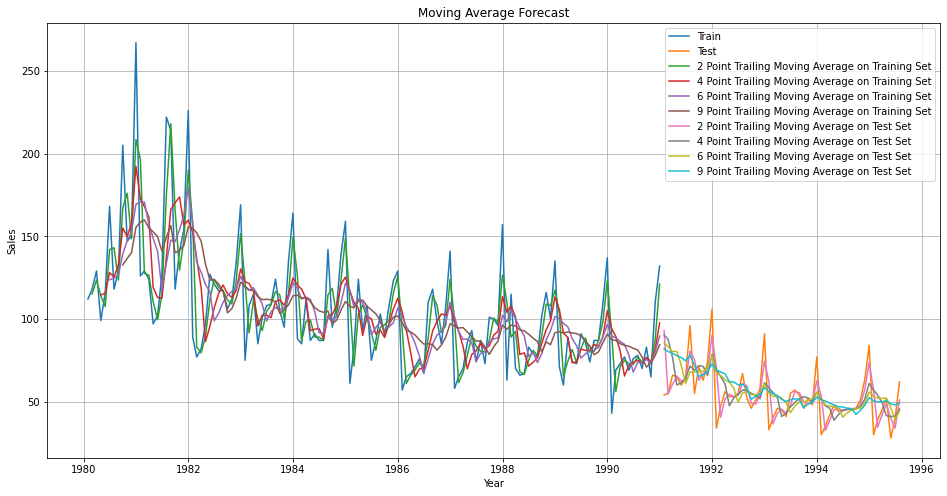

In [75]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Year') 
plt.ylabel('Sales')
plt.title('Moving Average Forecast')
plt.grid();

In [76]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728 


In [77]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             51.433312
NaiveModel                   79.718773
SimpleAverageModel           53.460570
2pointTrailingMovingAverage  11.529278
4pointTrailingMovingAverage  14.451403
6pointTrailingMovingAverage  14.566327
9pointTrailingMovingAverage  14.727630

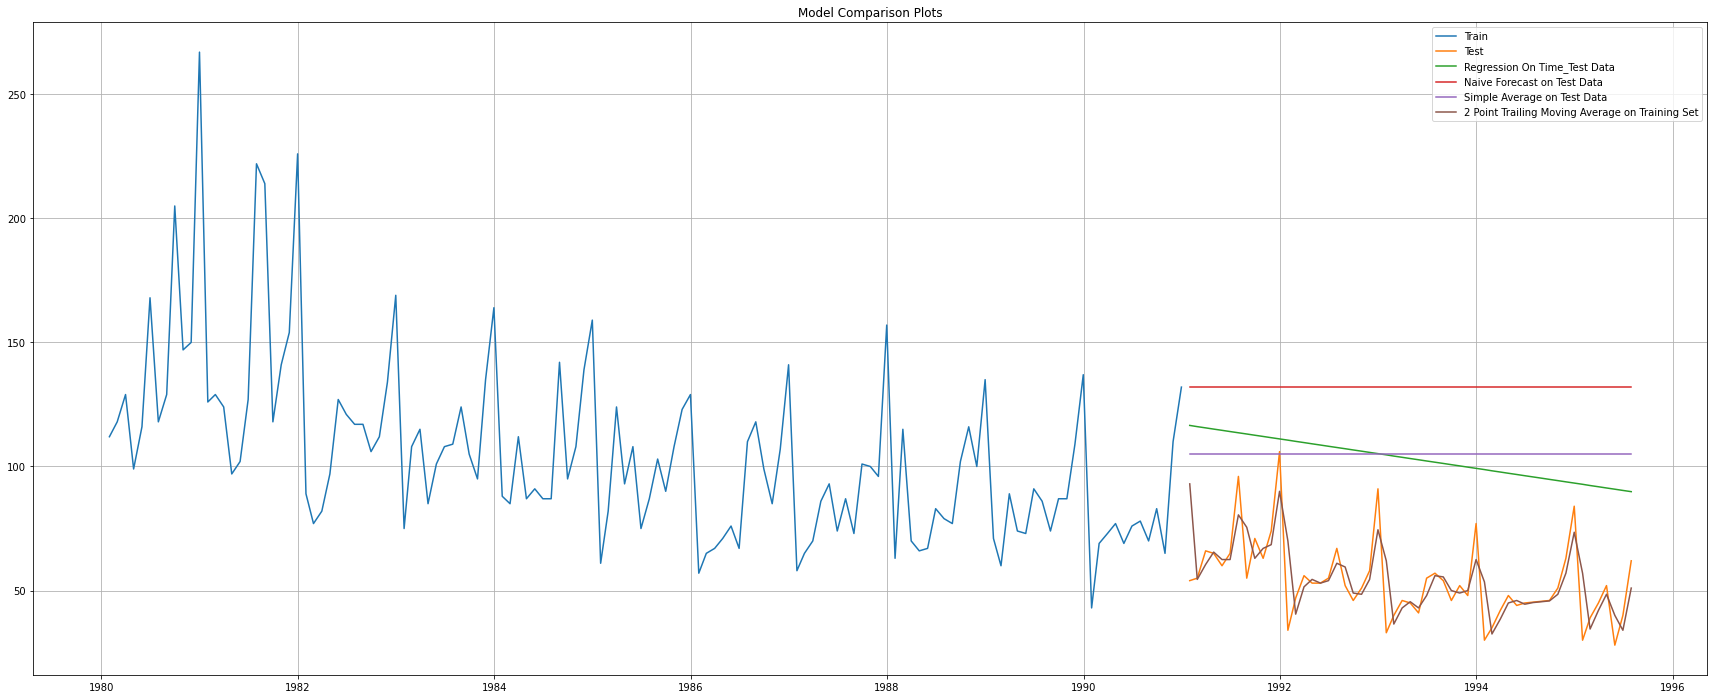

In [78]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [79]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [80]:
SES_train = train.copy()
SES_test = test.copy()

In [81]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [82]:
model_SES_autofit = model_SES.fit(optimized=True)

In [83]:
model_SES_autofit.params

{'smoothing_level': 0.09874989207824814,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.3869755697016,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [84]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  87.104999
1991-02-28  55.0  87.104999
1991-03-31  66.0  87.104999
1991-04-30  65.0  87.104999
1991-05-31  60.0  87.104999

Text(0, 0.5, 'Sale')

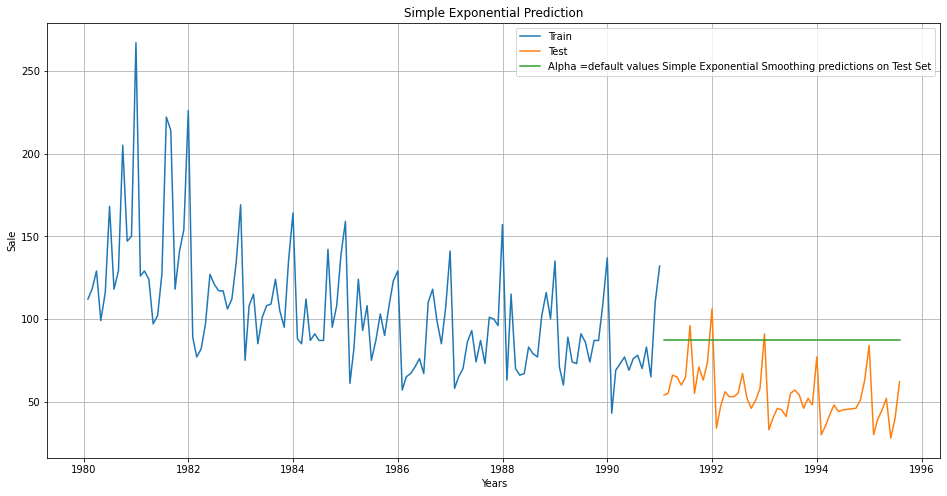

In [85]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =default values Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple Exponential Prediction');
plt.xlabel('Years')
plt.ylabel('Sale')

In [86]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha = (default) Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha = (default) Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796


In [87]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=(default),SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                            51.433312
NaiveModel                                  79.718773
SimpleAverageModel                          53.460570
2pointTrailingMovingAverage                 11.529278
4pointTrailingMovingAverage                 14.451403
6pointTrailingMovingAverage                 14.566327
9pointTrailingMovingAverage                 14.727630
Alpha=(default),SimpleExponentialSmoothing  36.796242

In [88]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [89]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)


In [90]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
0           0.3   32.470164  47.504821
1           0.4   33.035130  53.767406
2           0.5   33.682839  59.641786
3           0.6   34.441171  64.971288
4           0.7   35.323261  69.698162
5           0.8   36.334596  73.773992
6           0.9   37.482782  77.139276

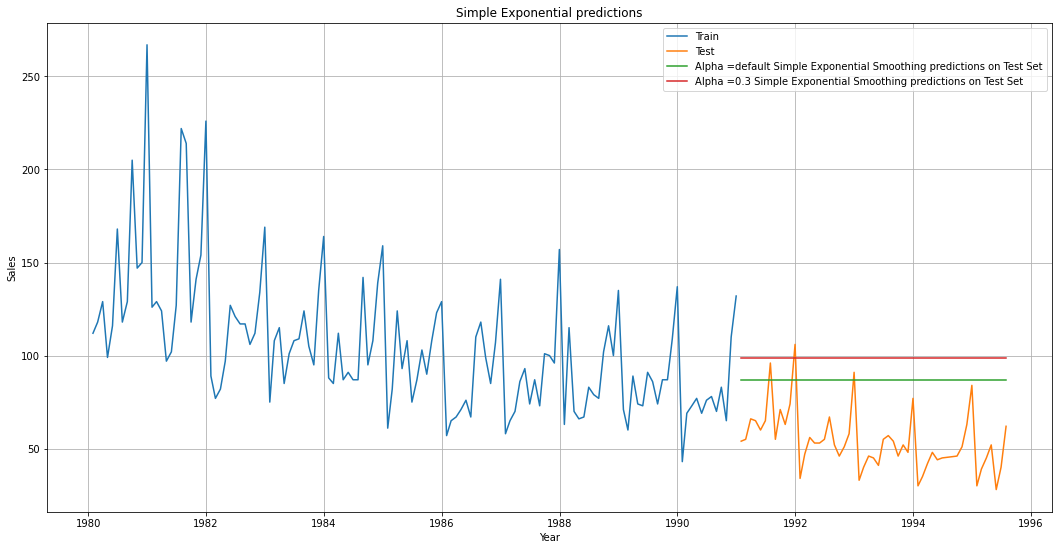

In [91]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =default Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Simple Exponential predictions')

plt.legend(loc='best')
plt.grid();

In [92]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                            51.433312
NaiveModel                                  79.718773
SimpleAverageModel                          53.460570
2pointTrailingMovingAverage                 11.529278
4pointTrailingMovingAverage                 14.451403
6pointTrailingMovingAverage                 14.566327
9pointTrailingMovingAverage                 14.727630
Alpha=(default),SimpleExponentialSmoothing  36.796242
Alpha=0.3,SimpleExponentialSmoothing        47.504821

In [93]:
DES_train = train.copy()
DES_test = test.copy()

In [94]:
model_DES = Holt(DES_train['Rose'])

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [95]:
model_DES_autofit = model_DES.fit(optimized=True)

In [96]:
model_DES_autofit.params

{'smoothing_level': 1.4903125742637627e-08,
 'smoothing_trend': 2.1223534724116133e-19,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81550190772285,
 'initial_trend': -0.49437764051620653,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [97]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  72.063276
1991-02-28  55.0  71.568898
1991-03-31  66.0  71.074520
1991-04-30  65.0  70.580143
1991-05-31  60.0  70.085765

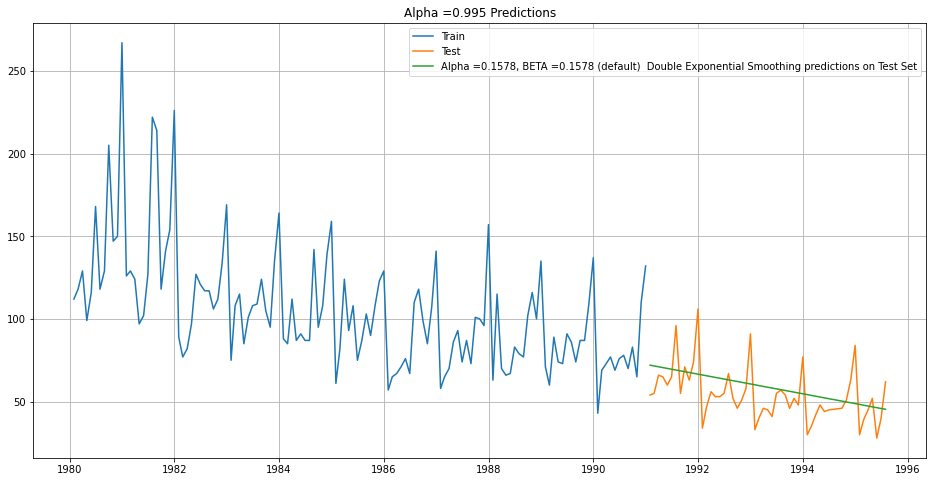

In [98]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.1578, BETA =0.1578 (default)  Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [99]:
rmse_model6_test_1 = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict'],squared=False)
print("For Alpha=0.1578,Beta=0.01578 (default) Double Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.1578,Beta=0.01578 (default) Double Exponential Smoothing Model forecast on the Test Data,  RMSE is 15.269


In [100]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.1578,Beta=0.1578,default DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                    51.433312
NaiveModel                                          79.718773
SimpleAverageModel                                  53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=(default),SimpleExponentialSmoothing          36.796242
Alpha=0.3,SimpleExponentialSmoothing                47.504821
Alpha=0.1578,Beta=0.1578,default DoubleExponent...  15.268960

In [101]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [102]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

<ipython-input-102-22aadbfd3cc6>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
<ipython-input-102-22aadbfd3cc6>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
<ipython-input-102-22aadbfd3cc6>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
<ipython-input-102-22aadbfd3cc6>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
<ipython-input-102-22aadbfd3cc6>:3: FutureWarning: the '

<ipython-input-102-22aadbfd3cc6>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
<ipython-input-102-22aadbfd3cc6>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
<ipython-input-102-22aadbfd3cc6>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
<ipython-input-102-22aadbfd3cc6>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
<ipython-input-102-22aadbfd3cc6>:3: FutureWarning: the '

In [103]:
resultsDf_8

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.3          0.3   35.944983  265.567594
1            0.3          0.4   37.393239  358.750942
2            0.3          0.5   38.888325  451.810230
3            0.3          0.6   40.280670  536.954148
4            0.3          0.7   41.403518  601.616351
..           ...          ...         ...         ...
59           1.0          0.6   51.831610  801.680218
60           1.0          0.7   54.497039  841.892573
61           1.0          0.8   57.365879  853.965537
62           1.0          0.9   60.474309  834.710935
63           1.0          1.0   63.873454  780.079579

[64 rows x 4 columns]

In [104]:
resultsDf_8.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.3          0.3   35.944983  265.567594
8            0.4          0.3   36.749123  339.306534
1            0.3          0.4   37.393239  358.750942
16           0.5          0.3   37.433314  394.272629
24           0.6          0.3   38.348984  439.296033

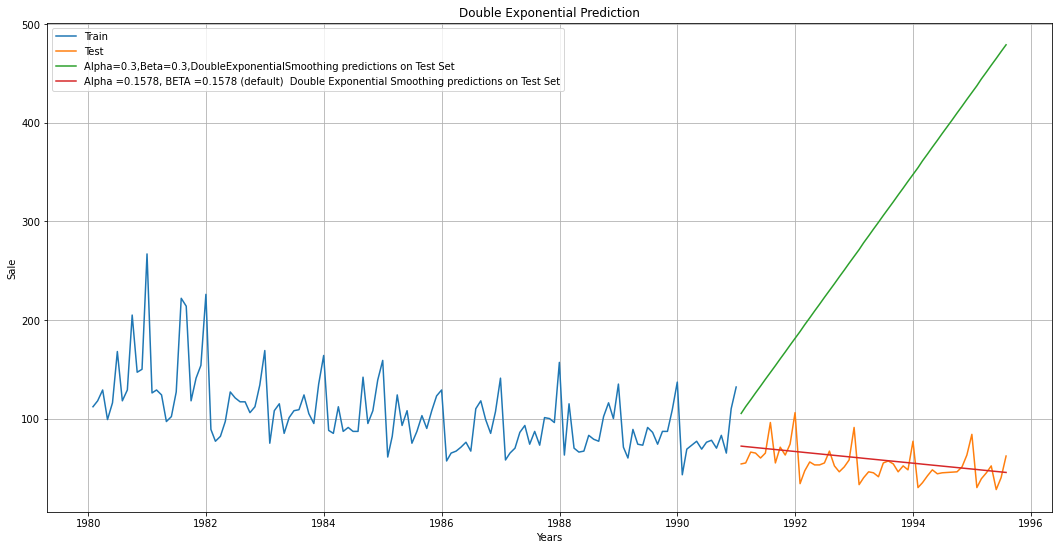

In [105]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(DES_test['predict'], label='Alpha =0.1578, BETA =0.1578 (default)  Double Exponential Smoothing predictions on Test Set')

plt.xlabel('Years')
plt.ylabel('Sale')
plt.title('Double Exponential Prediction')

plt.legend(loc='best')
plt.grid();

In [106]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [resultsDf_8.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

Test RMSE
RegressionOnTime                                     51.433312
NaiveModel                                           79.718773
SimpleAverageModel                                   53.460570
2pointTrailingMovingAverage                          11.529278
4pointTrailingMovingAverage                          14.451403
6pointTrailingMovingAverage                          14.566327
9pointTrailingMovingAverage                          14.727630
Alpha=(default),SimpleExponentialSmoothing           36.796242
Alpha=0.3,SimpleExponentialSmoothing                 47.504821
Alpha=0.1578,Beta=0.1578,default DoubleExponent...   15.268960
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.567594

In [107]:
TES_train = train.copy()
TES_test = test.copy()

In [108]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [109]:
model_TES_autofit = model_TES.fit()

In [110]:
model_TES_autofit.params

{'smoothing_level': 0.10053559166352141,
 'smoothing_trend': 2.9667113597565187e-06,
 'smoothing_seasonal': 3.752823638129799e-07,
 'damping_trend': nan,
 'initial_level': 49.81115356815166,
 'initial_trend': -0.19155645429914447,
 'initial_seasons': array([2.19563917, 2.47993924, 2.71080105, 2.37691247, 2.66805867,
        2.8714592 , 3.16165653, 3.38100476, 3.16286393, 3.11258111,
        3.61951388, 4.95479995]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [111]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose  auto_predict
Time_Stamp                    
1991-01-31  54.0     54.078681
1991-02-28  55.0     60.605971
1991-03-31  66.0     65.728614
1991-04-30  65.0     57.177535
1991-05-31  60.0     63.670076

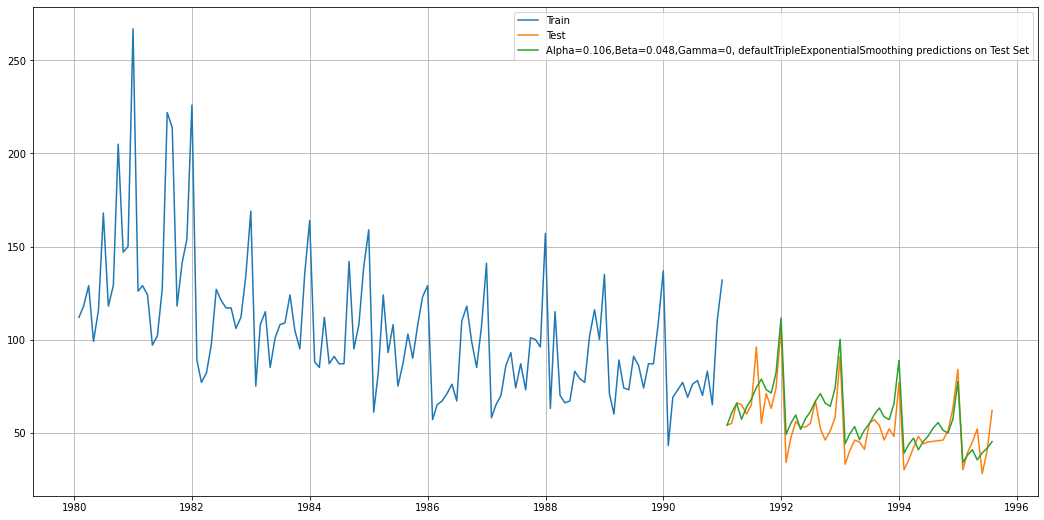

In [112]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.106,Beta=0.048,Gamma=0, defaultTripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [113]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.106,Beta=0.048,Gamma=0, default Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.106,Beta=0.048,Gamma=0, default Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 9.773


In [114]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.106,Beta=0.048,Gamma=0, default TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

Test RMSE
RegressionOnTime                                     51.433312
NaiveModel                                           79.718773
SimpleAverageModel                                   53.460570
2pointTrailingMovingAverage                          11.529278
4pointTrailingMovingAverage                          14.451403
6pointTrailingMovingAverage                          14.566327
9pointTrailingMovingAverage                          14.727630
Alpha=(default),SimpleExponentialSmoothing           36.796242
Alpha=0.3,SimpleExponentialSmoothing                 47.504821
Alpha=0.1578,Beta=0.1578,default DoubleExponent...   15.268960
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.567594
Alpha=0.106,Beta=0.048,Gamma=0, default TripleE...    9.773000

In [115]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_11= pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_11

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [116]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_11 = resultsDf_11.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-116-6fc4d17a2ead>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

In [117]:
resultsDf_11.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
8             0.3          0.4           0.3   28.111886  10.945435
1             0.3          0.3           0.4   27.399095  11.201633
69            0.4          0.3           0.8   32.601491  12.615607
16            0.3          0.5           0.3   29.087520  14.414604
131           0.5          0.3           0.6   32.144773  16.720720

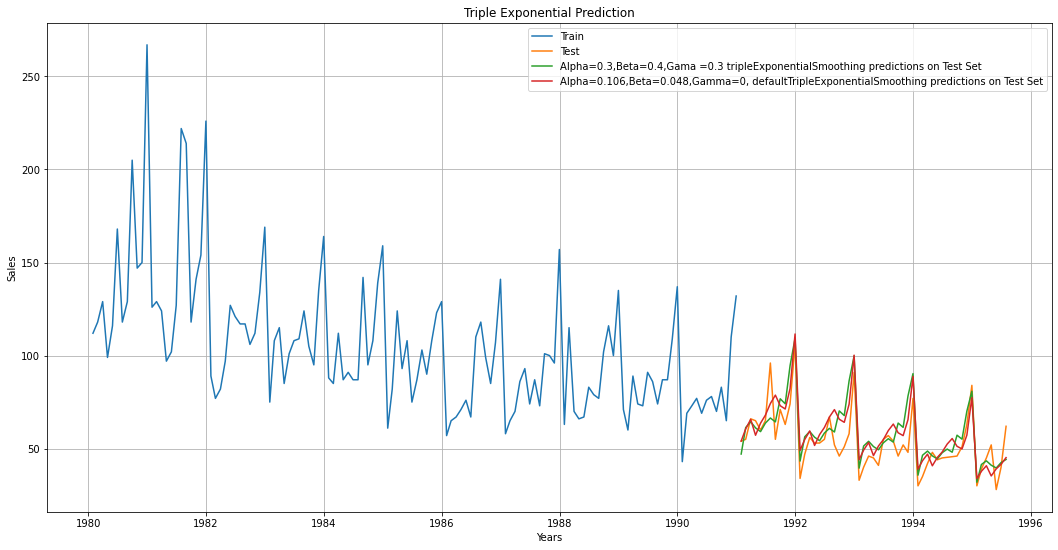

In [118]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['predict', 0.3, 0.4,0.3], label='Alpha=0.3,Beta=0.4,Gama =0.3 tripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.106,Beta=0.048,Gamma=0, defaultTripleExponentialSmoothing predictions on Test Set')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('Triple Exponential Prediction')
plt.legend(loc='best')
plt.grid();

In [119]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [resultsDf_11.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

Test RMSE
RegressionOnTime                                     51.433312
NaiveModel                                           79.718773
SimpleAverageModel                                   53.460570
2pointTrailingMovingAverage                          11.529278
4pointTrailingMovingAverage                          14.451403
6pointTrailingMovingAverage                          14.566327
9pointTrailingMovingAverage                          14.727630
Alpha=(default),SimpleExponentialSmoothing           36.796242
Alpha=0.3,SimpleExponentialSmoothing                 47.504821
Alpha=0.1578,Beta=0.1578,default DoubleExponent...   15.268960
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.567594
Alpha=0.106,Beta=0.048,Gamma=0, default TripleE...    9.773000
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...   10.945435

In [120]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.106,Beta=0.048,Gamma=0, default TripleE...    9.773000
Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialS...   10.945435
2pointTrailingMovingAverage                          11.529278
4pointTrailingMovingAverage                          14.451403
6pointTrailingMovingAverage                          14.566327
9pointTrailingMovingAverage                          14.727630
Alpha=0.1578,Beta=0.1578,default DoubleExponent...   15.268960
Alpha=(default),SimpleExponentialSmoothing           36.796242
Alpha=0.3,SimpleExponentialSmoothing                 47.504821
RegressionOnTime                                     51.433312
SimpleAverageModel                                   53.460570
NaiveModel                                           79.718773
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.567594

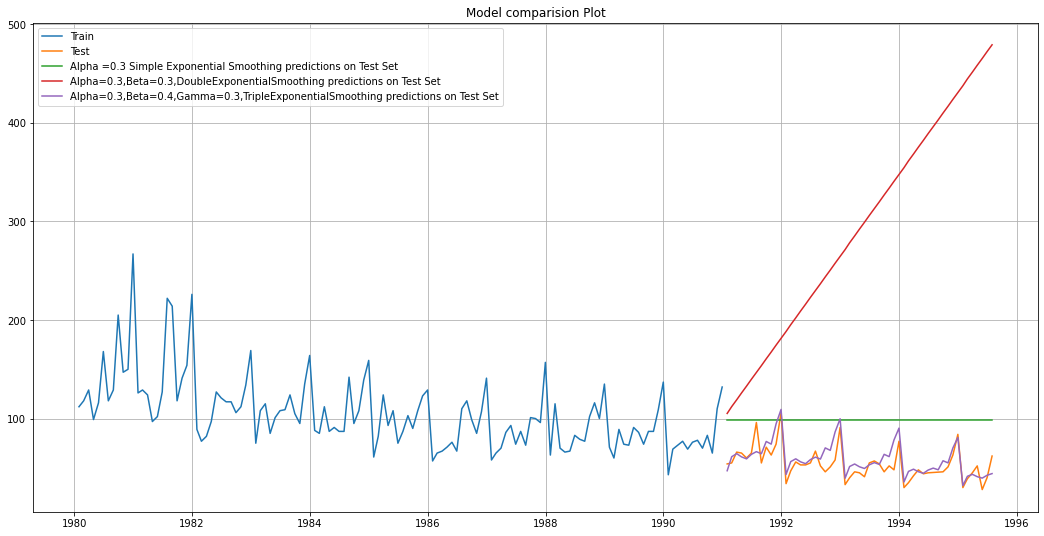

In [121]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Model comparision Plot');

### Check for stationarity of the whole Time Series data.

In [122]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    plt.figure(figsize=(16,8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

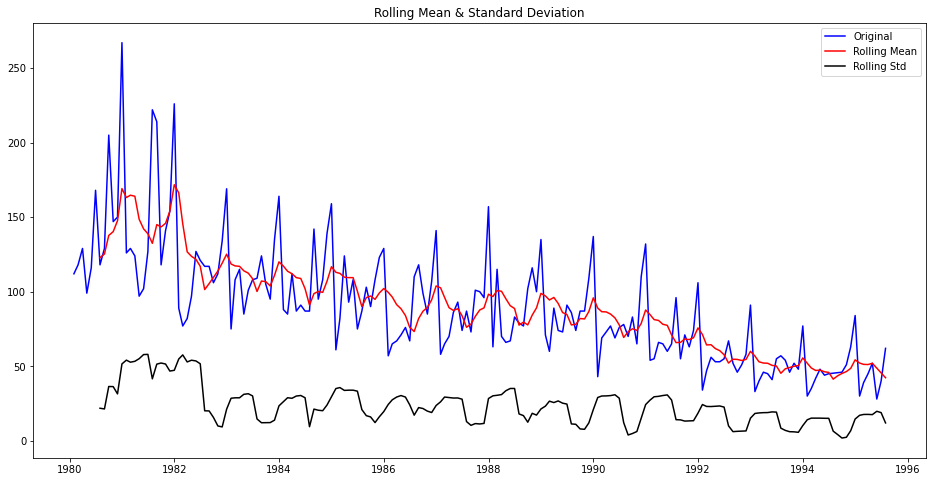

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [123]:
test_stationarity(df['Rose'])

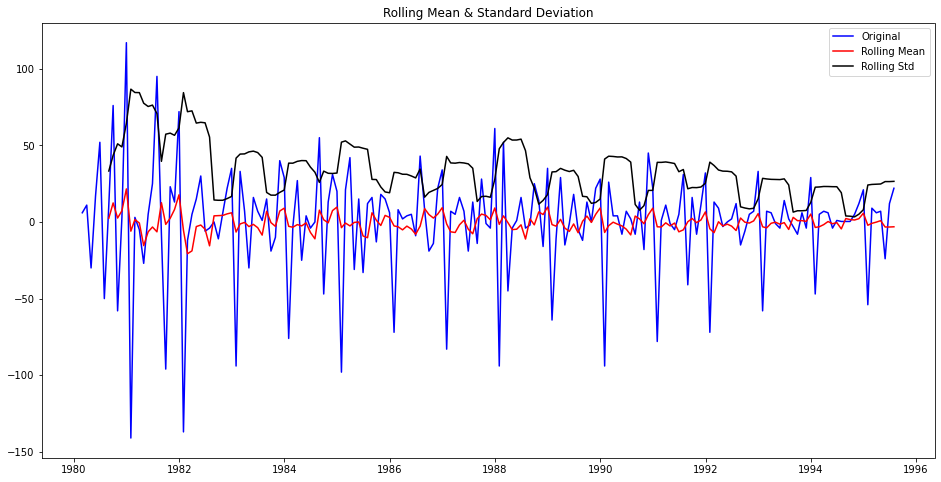

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [124]:
#We see that at 5% significant level the Time Series is non-stationary.
#Let us take a difference of order 1 and check whether the Time Series is stationary or not.
test_stationarity(df['Rose'].diff().dropna())

In [125]:
# We see that at  𝛼  = 0.05 the Time Series is indeed stationary.

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [126]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

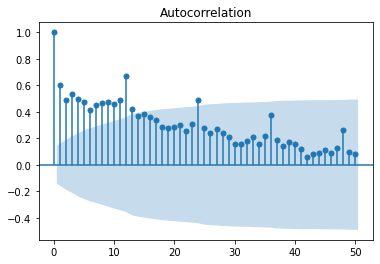

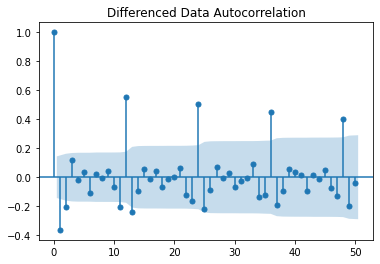

In [127]:

plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')

plt.show()

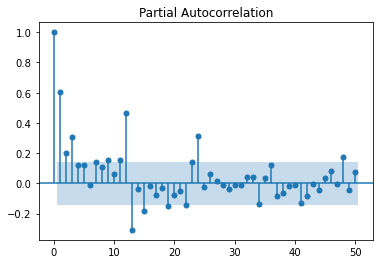

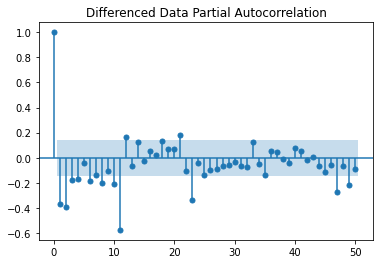

In [128]:
plot_pacf(df['Rose'],lags=50)
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [129]:
# From the above plots, we can say that there seems to be a seasonality in the data.

### Split the data into train and test and plot the training and test data.

In [130]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [131]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [132]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Test Data


Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Test Data


Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [133]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


### Check for stationarity of the Training Data Time Series.

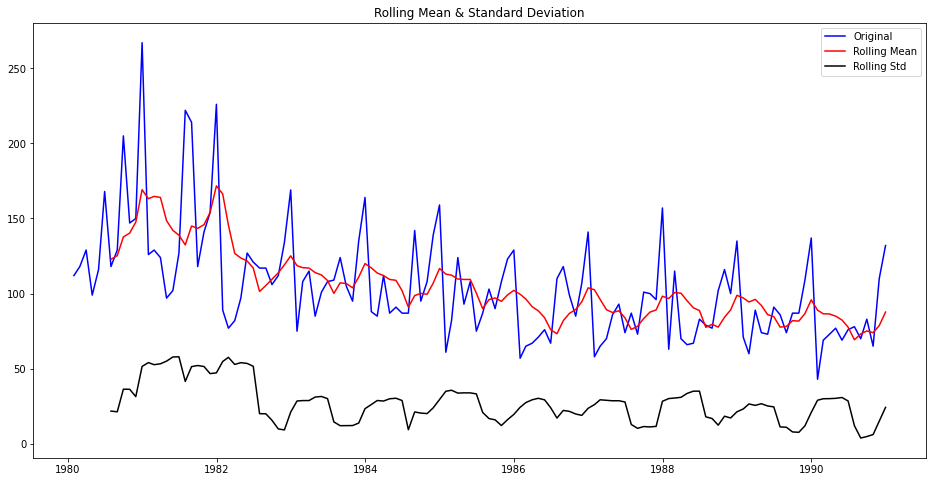

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [134]:
test_stationarity(train['Rose'])

In [135]:
# We see that the series is not stationary at  𝛼  = 0.05.

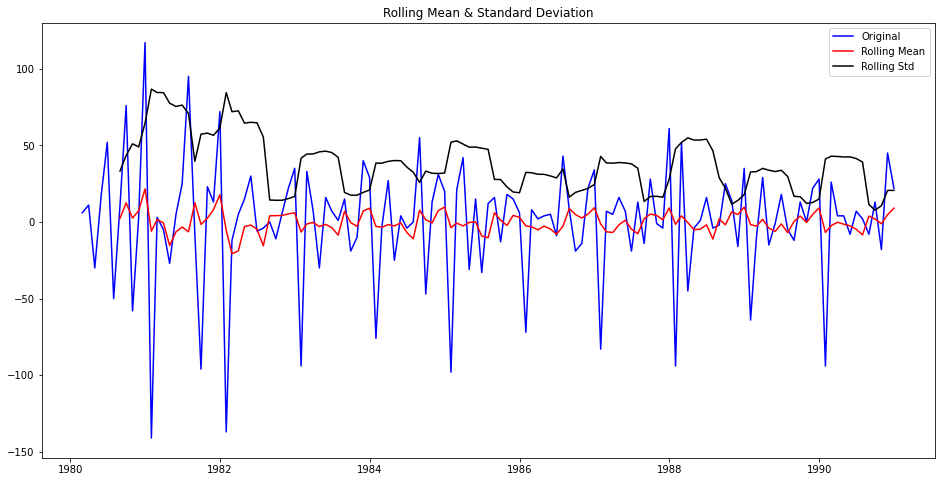

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [136]:
test_stationarity(train['Rose'].diff().dropna())

In [137]:
#We see that after taking a difference of order 1 the series have become stationary at  𝛼  = 0.05.

### Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [138]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [139]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [140]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.726183046448


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 2) - AIC:1276.8353727957747
ARIMA(1, 1, 0) - AIC:1319.3483105802602


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(1, 1, 1) - AIC:1277.775749775043


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(1, 1, 2) - AIC:1277.3592236734212
ARIMA(2, 1, 0) - AIC:1300.6092611743966


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 1, 1) - AIC:1279.045689409315
ARIMA(2, 1, 2) - AIC:1279.2986939365064


/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [141]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1276.835373
5  (1, 1, 2)  1277.359224
4  (1, 1, 1)  1277.775750
7  (2, 1, 1)  1279.045689
8  (2, 1, 2)  1279.298694
1  (0, 1, 1)  1280.726183
6  (2, 1, 0)  1300.609261
3  (1, 1, 0)  1319.348311
0  (0, 1, 0)  1335.152658

In [142]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sat, 18 Sep 2021   AIC                           1276.835
Time:                        20:28:50   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

In [143]:
#### Predict on the Test Set using this model and evaluate the model.

In [144]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [145]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.618059133184662


In [146]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['auto ARIMA(0,1,2)'])

resultsDf



RMSE
auto ARIMA(0,1,2)  15.618059

In [147]:
#results_auto_ARIMA.plot_diagnostics()
#plt.show()

### Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

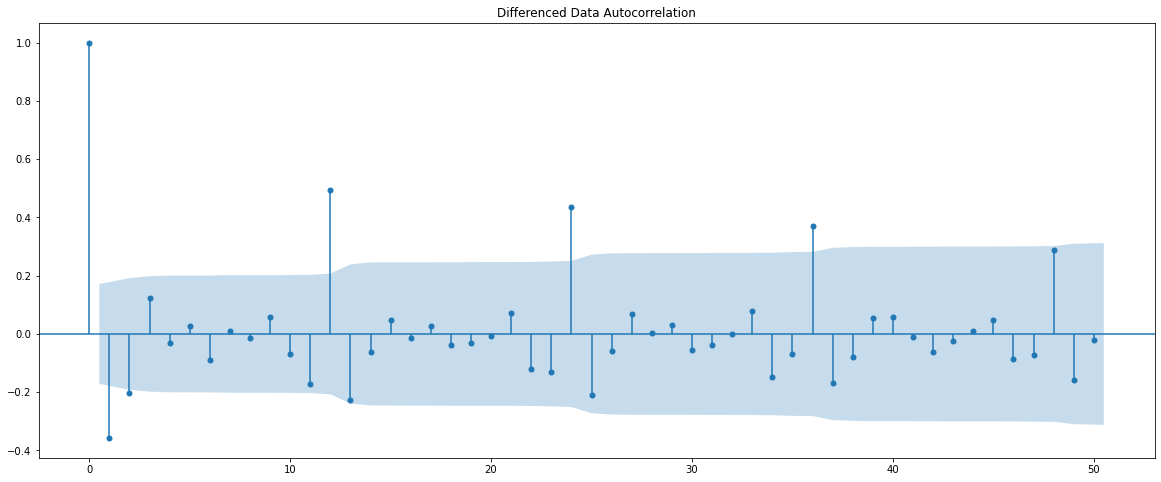

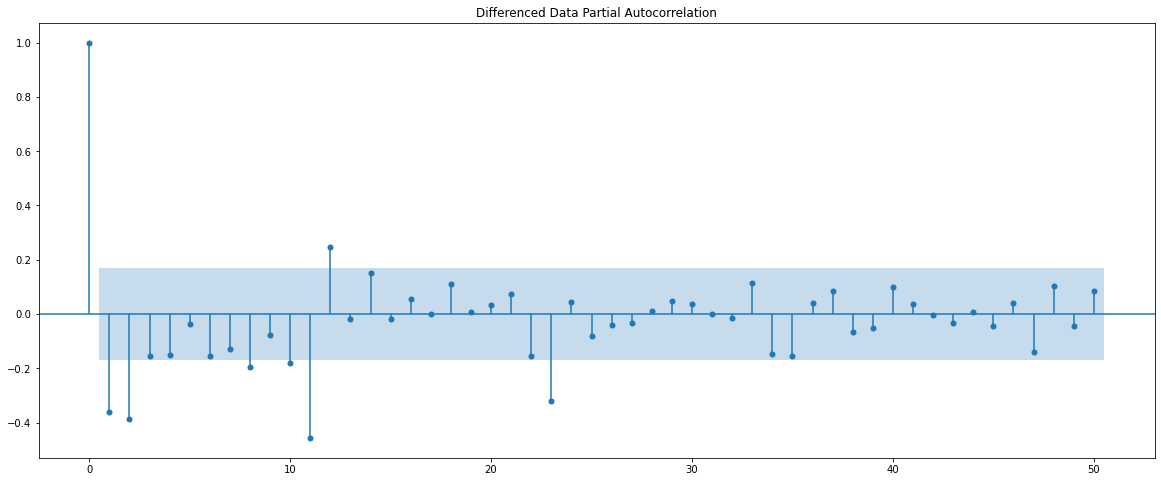

In [148]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [149]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(2,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Sat, 18 Sep 2021   AIC                           1279.299
Time:                        20:28:52   BIC                           1296.550
Sample:                    02-29-1980   HQIC                          1286.309
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Rose    -0.4383      0.218     -2.015      0.044      -0.865      -0.012
ar.L2.D.Rose     0.0269      0.109      0.24

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [150]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [151]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

15.354885453349343


In [152]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['manual ARIMA(2,1,2)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
auto ARIMA(0,1,2)    15.618059
manual ARIMA(2,1,2)  15.354885

### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

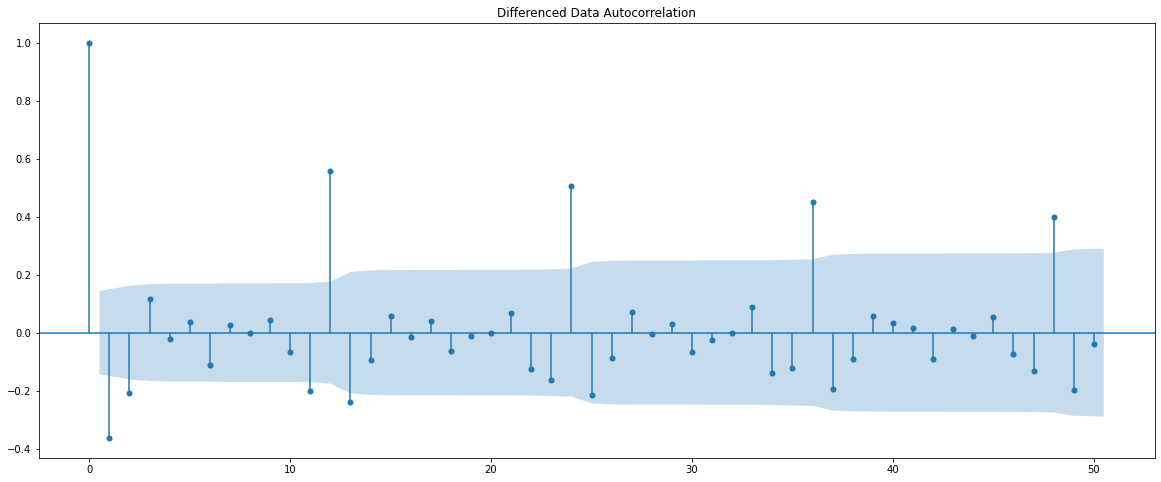

In [153]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

### Setting the seasonality as 6 for the first iteration of the auto SARIMA model

In [154]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [155]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [156]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113865
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827401
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149125
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.309326672216
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515201
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426339441
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029554
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.1908217752778
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.4354735745055
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.4386253746572
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.856412330377
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.7490379982632
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.6455188249363
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.0044082625043
SARIMA(0, 1, 2)x(0, 0, 0, 6) -

In [157]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1041.655819
26  (0, 1, 2)  (2, 0, 2, 6)  1043.600261
80  (2, 1, 2)  (2, 0, 2, 6)  1045.220390
71  (2, 1, 1)  (2, 0, 2, 6)  1051.673461
44  (1, 1, 1)  (2, 0, 2, 6)  1052.778470

In [158]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Sat, 18 Sep 2021   AIC                           1041.656
Time:                                   20:29:42   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5940      0.152     -3.919      0.000      -0.891      -0.297
ma.L1         -0.1953    611.849     -0.000

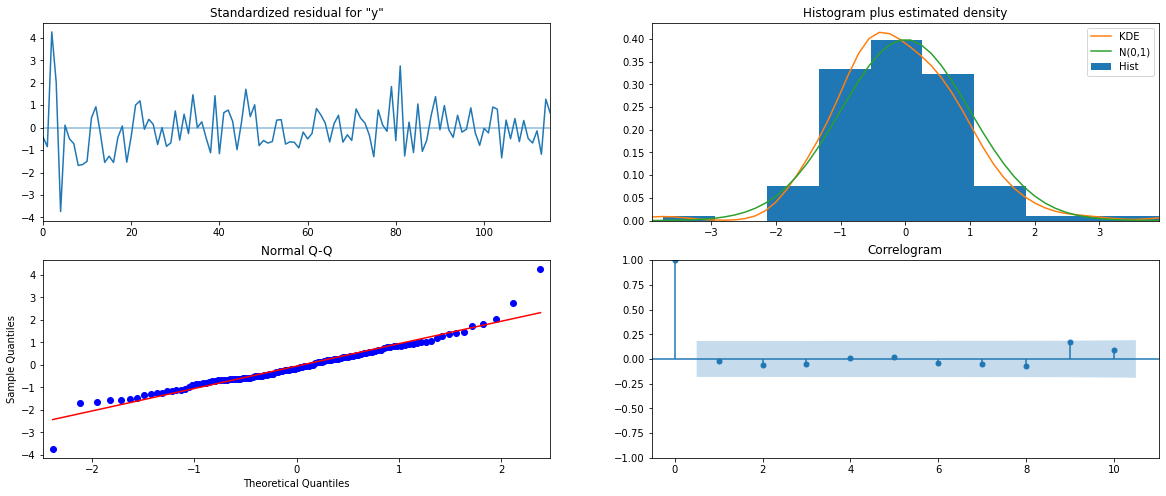

In [159]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [160]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [161]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.842122  18.848819      25.899116      99.785129
1  67.631262  19.300577      29.802826     105.459698
2  74.748081  19.413146      36.699013     112.797149
3  71.327073  19.476106      33.154607     109.499538
4  76.020587  19.484391      37.831882     114.209292

In [162]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

26.137058582692337


In [163]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['auto SARIMA(1,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
auto ARIMA(0,1,2)            15.618059
manual ARIMA(2,1,2)          15.354885
auto SARIMA(1,1,2)(2,0,2,6)  26.137059

### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [164]:
import itertools
p = q = range(0, 3)
d= range(0,1)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)


In [165]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [166]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1607.5307543879908
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1342.887979632014
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:1127.6939671247744
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1123.327544387293
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1072.6552135795077
SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:947.5166315762867
SARIMA(0, 0, 0)x(2, 0, 0, 12) - AIC:939.9681316162017
SARIMA(0, 0, 0)x(2, 0, 1, 12) - AIC:941.4830987726801
SARIMA(0, 0, 0)x(2, 0, 2, 12) - AIC:931.5268657156478
SARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1481.8198652085207
SARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1253.5306740985513
SARIMA(0, 0, 1)x(0, 0, 2, 12) - AIC:1091.9969256558784
SARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1115.8133005172044
SARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1060.2945964047146
SARIMA(0, 0, 1)x(1, 0, 2, 12) - AIC:930.2924269037886
SARIMA(0, 0, 1)x(2, 0, 0, 12) - AIC:933.4715560649995
SARIMA(0, 0, 1)x(2, 0, 1, 12) - AIC:935.4846174257956
SARIMA(0, 0, 1)x(2, 0, 2, 12) - AIC:915.769457761623
SARIMA(0, 0, 2)x(0, 0

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(2, 0, 0, 12) - AIC:914.687388651912
SARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:932.0304670804425
SARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:900.2563605004635
SARIMA(2, 0, 0)x(0, 0, 0, 12) - AIC:1308.2736030498356
SARIMA(2, 0, 0)x(0, 0, 1, 12) - AIC:1144.0819681754606
SARIMA(2, 0, 0)x(0, 0, 2, 12) - AIC:975.8159073680378
SARIMA(2, 0, 0)x(1, 0, 0, 12) - AIC:1097.8439350588542
SARIMA(2, 0, 0)x(1, 0, 1, 12) - AIC:1061.8289040085906
SARIMA(2, 0, 0)x(1, 0, 2, 12) - AIC:940.22823249448
SARIMA(2, 0, 0)x(2, 0, 0, 12) - AIC:916.4595541129352
SARIMA(2, 0, 0)x(2, 0, 1, 12) - AIC:918.4101007239882
SARIMA(2, 0, 0)x(2, 0, 2, 12) - AIC:916.2460072981279
SARIMA(2, 0, 1)x(0, 0, 0, 12) - AIC:1266.3761682370155
SARIMA(2, 0, 1)x(0, 0, 1, 12) - AIC:1098.6978038442578
SARIMA(2, 0, 1)x(0, 0, 2, 12) - AIC:929.3546142201235
SARIMA(2, 0, 1)x(1, 0, 0, 12) - AIC:1082.073421064309
SARIMA(2, 0, 1)x(1, 0, 1, 12) - AIC:1064.3217295842378
SARIMA(2, 0, 1)x(1, 0, 2, 12) - AIC:935.0198988167192
SARIMA(2, 0, 1)x(2, 0, 0

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 1)x(2, 0, 1, 12) - AIC:908.8841888571009
SARIMA(2, 0, 1)x(2, 0, 2, 12) - AIC:915.8344020649067
SARIMA(2, 0, 2)x(0, 0, 0, 12) - AIC:1258.6801764024744
SARIMA(2, 0, 2)x(0, 0, 1, 12) - AIC:1090.1620243557054
SARIMA(2, 0, 2)x(0, 0, 2, 12) - AIC:924.8238875873748
SARIMA(2, 0, 2)x(1, 0, 0, 12) - AIC:1079.4221770662089
SARIMA(2, 0, 2)x(1, 0, 1, 12) - AIC:1054.44315292515
SARIMA(2, 0, 2)x(1, 0, 2, 12) - AIC:916.842729710524
SARIMA(2, 0, 2)x(2, 0, 0, 12) - AIC:908.8951385584377
SARIMA(2, 0, 2)x(2, 0, 1, 12) - AIC:910.3684937357535
SARIMA(2, 0, 2)x(2, 0, 2, 12) - AIC:909.4196183601728


In [167]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
53  (1, 0, 2)  (2, 0, 2, 12)  900.256361
26  (0, 0, 2)  (2, 0, 2, 12)  907.120306
69  (2, 0, 1)  (2, 0, 0, 12)  907.278530
70  (2, 0, 1)  (2, 0, 1, 12)  908.884189
78  (2, 0, 2)  (2, 0, 0, 12)  908.895139

In [168]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 0, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 0, 2)x(2, 0, 2, 12)   Log Likelihood                -442.128
Date:                            Sat, 18 Sep 2021   AIC                            900.256
Time:                                    20:31:20   BIC                            921.488
Sample:                                         0   HQIC                           908.860
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0009      0.003    319.086      0.000       0.995       1.007
ma.L1         -0.8493      0.178   

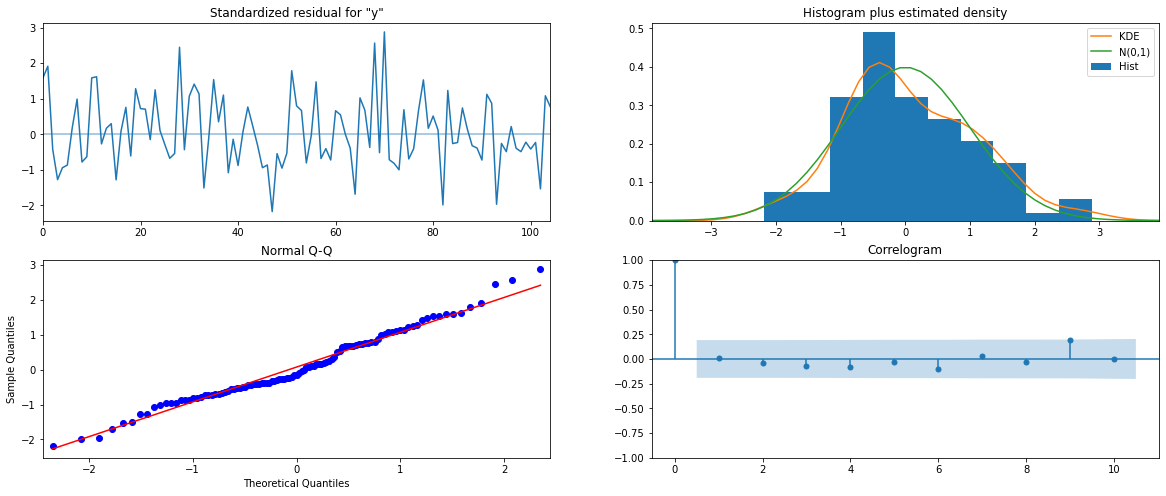

In [169]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [170]:
### Predict on the Test Set using this model and evaluate the model.

In [171]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [172]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  63.752605  16.029704      32.334962      95.170249
1  71.940989  16.235706      40.119589     103.762389
2  78.410220  16.235889      46.588462     110.231978
3  77.322263  16.236076      45.500139     109.144387
4  73.947327  16.236263      42.124836     105.769817

In [173]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

29.750116703737955


In [174]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['auto SARIMA(1,0,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
auto ARIMA(0,1,2)             15.618059
manual ARIMA(2,1,2)           15.354885
auto SARIMA(1,1,2)(2,0,2,6)   26.137059
auto SARIMA(1,0,2)(2,0,2,12)  29.750117

### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

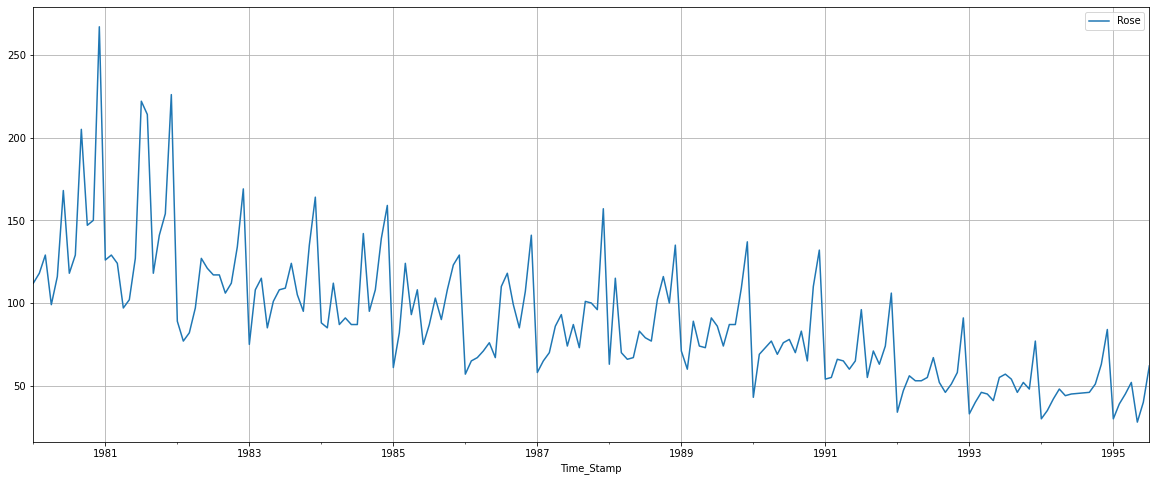

In [175]:
df.plot()
plt.grid();

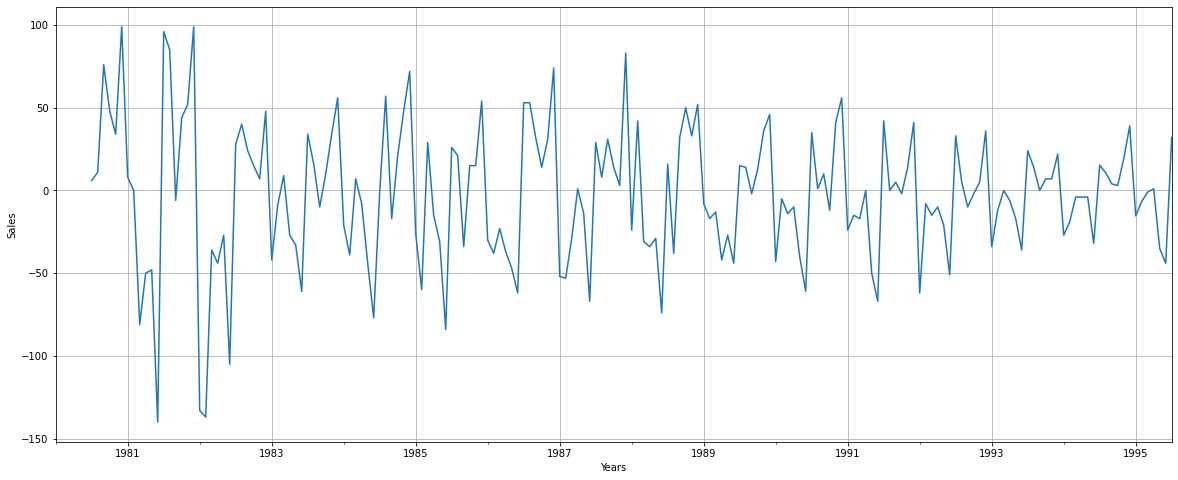

In [176]:
(df['Rose'].diff(6)).plot()
plt.xlabel('Years')
plt.ylabel('Sales')
plt.grid();

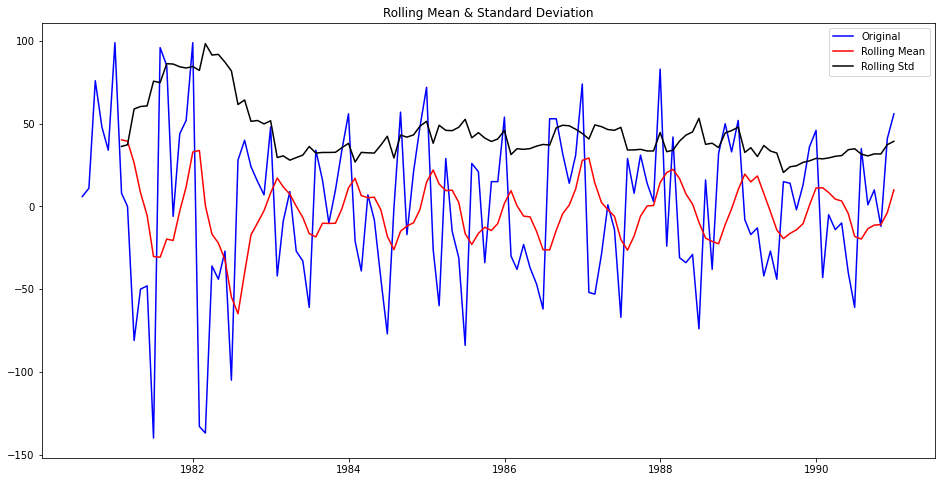

Results of Dickey-Fuller Test:
Test Statistic                -7.442449e+00
p-value                        5.956534e-11
#Lags Used                     7.000000e+00
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [177]:
test_stationarity((train['Rose'].diff(6).dropna()))

Text(0, 0.5, 'Percentage')

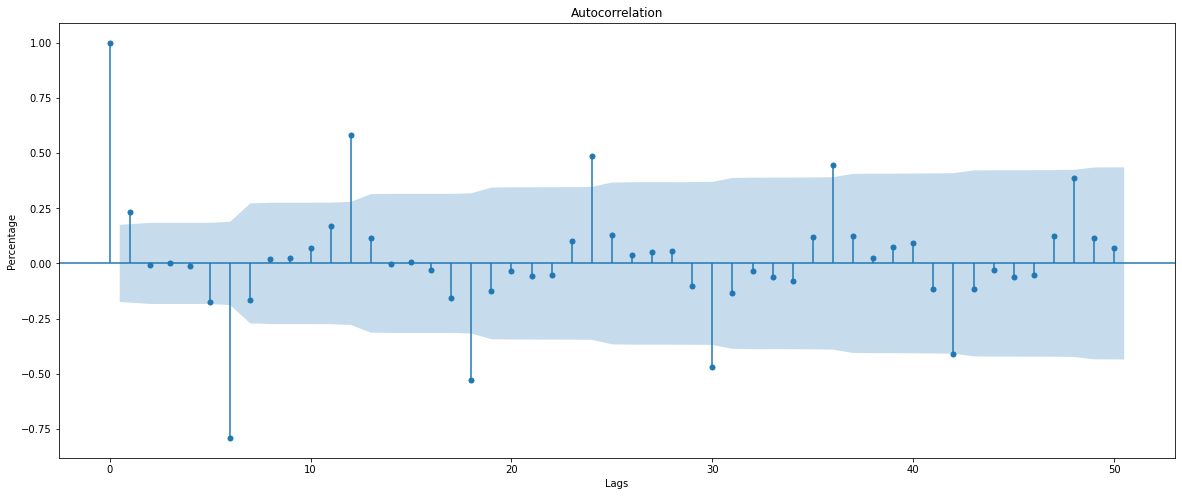

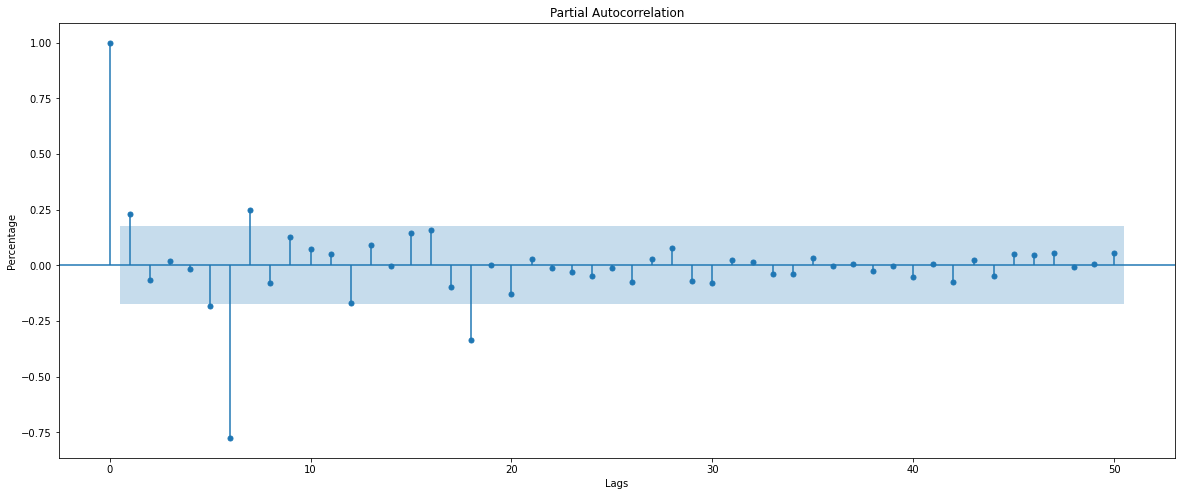

In [178]:
plot_acf((train['Rose'].diff(6).dropna()),lags=50)
plt.xlabel('Lags')
plt.ylabel('Percentage')
plot_pacf((train['Rose'].diff(6).dropna()),lags=50, method= "ywmle");
plt.xlabel('Lags')
plt.ylabel('Percentage')

In [179]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(1, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 6)   Log Likelihood                -535.247
Date:                             Sat, 18 Sep 2021   AIC                           1084.494
Time:                                     20:31:25   BIC                           1103.769
Sample:                                          0   HQIC                          1092.318
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0636      0.203     -0.314      0.754      -0.461       0.333
ar.L2         -0.3969      

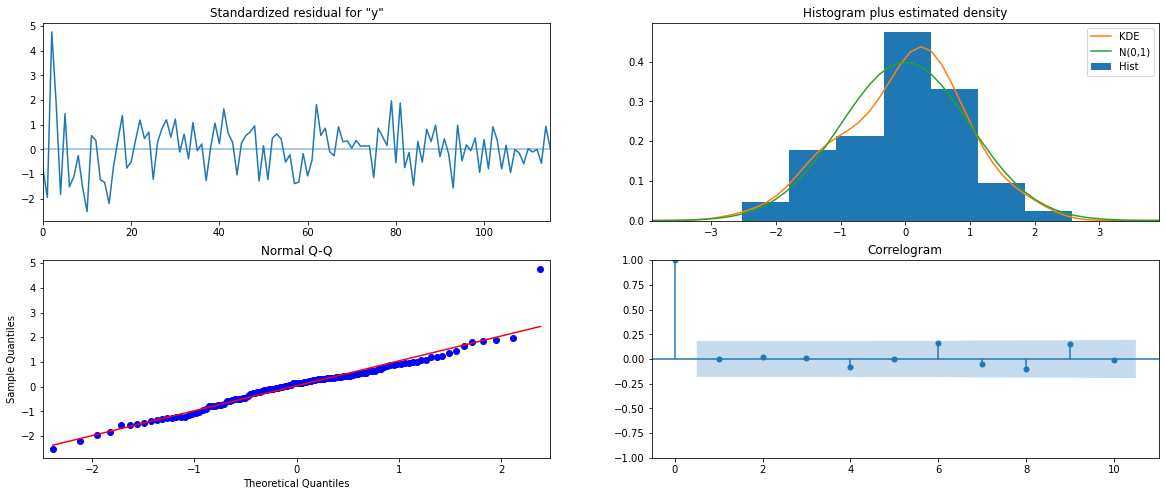

In [180]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [181]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [182]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  44.017157  23.898011      -2.822084      90.856398
1  61.837290  24.742055      13.343754     110.330826
2  76.345630  25.252958      26.850742     125.840519
3  80.549154  25.388186      30.789224     130.309083
4  65.695310  26.251850      14.242630     117.147990

In [183]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

19.04025093996595


In [184]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['manual SARIMA(2,1,2)(1,1,1,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
auto ARIMA(0,1,2)              15.618059
manual ARIMA(2,1,2)            15.354885
auto SARIMA(1,1,2)(2,0,2,6)    26.137059
auto SARIMA(1,0,2)(2,0,2,12)   29.750117
manual SARIMA(2,1,2)(1,1,1,6)  19.040251

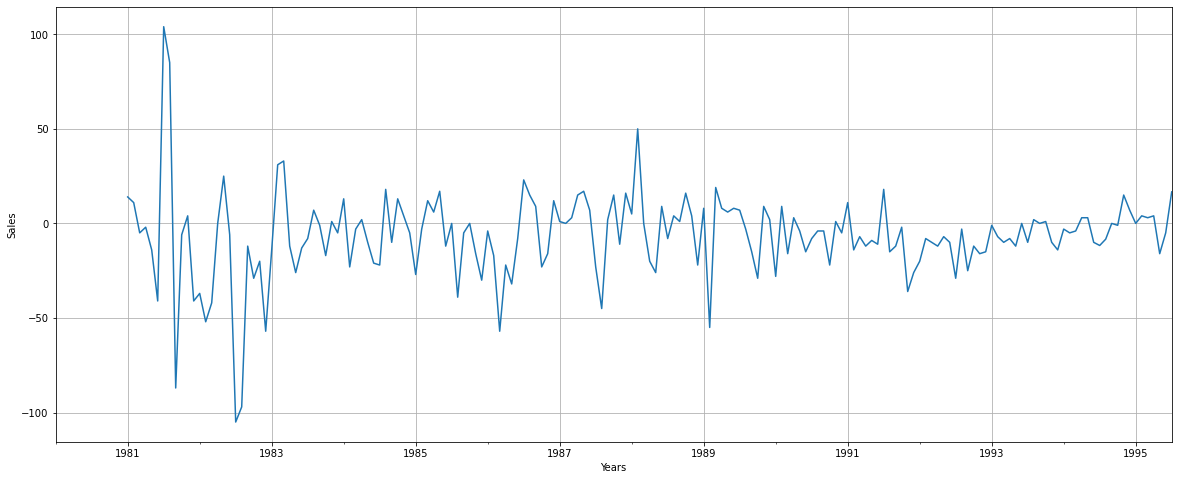

In [185]:
(df['Rose'].diff(12)).plot()
plt.xlabel('Years')
plt.ylabel('Sales')
plt.grid();

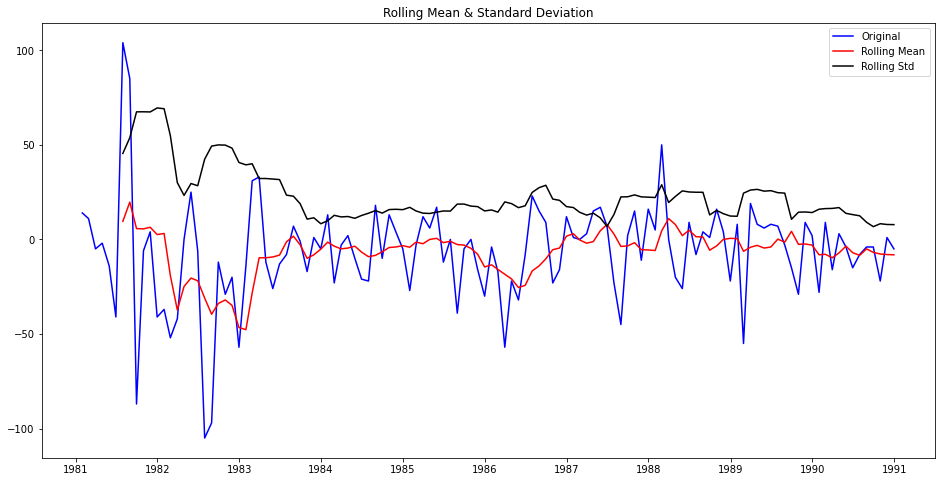

Results of Dickey-Fuller Test:
Test Statistic                  -3.619482
p-value                          0.005399
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [186]:
test_stationarity((train['Rose'].diff(12).dropna()))

Text(0, 0.5, 'Percentage')

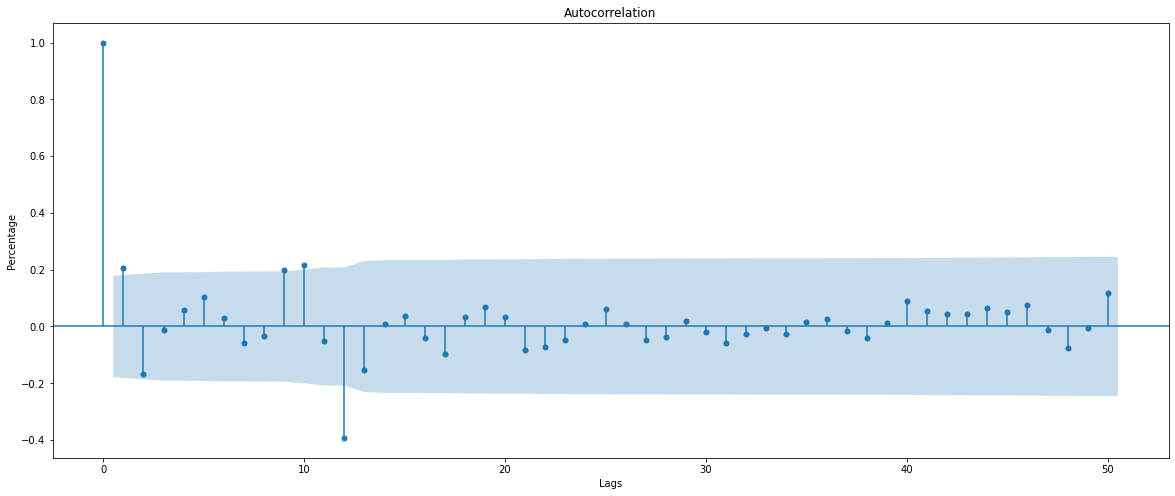

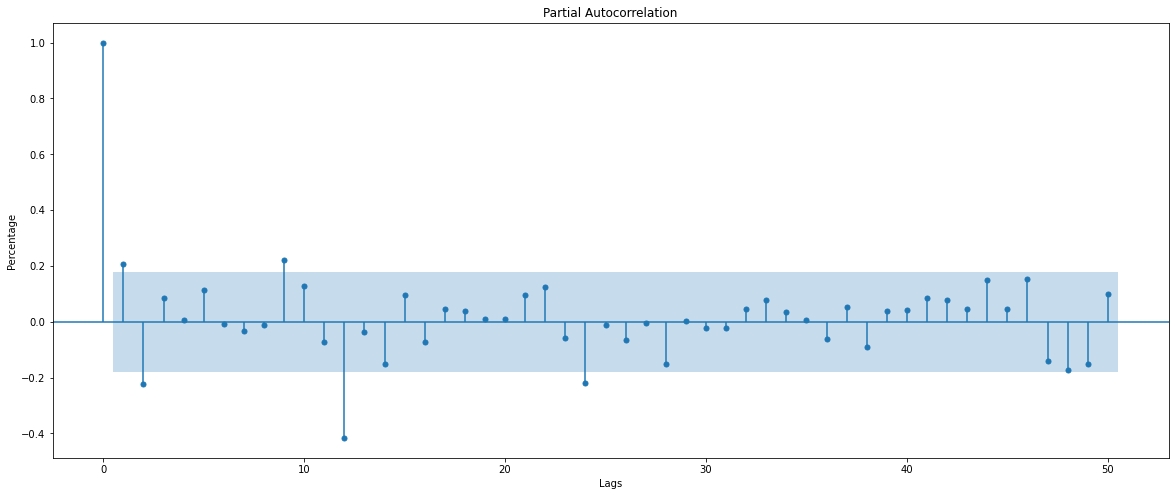

In [187]:
plot_acf((train['Rose'].diff(12).dropna()),lags=50)
plt.xlabel('Lags')
plt.ylabel('Percentage')
plot_pacf((train['Rose'].diff(12).dropna()),lags=50);
plt.xlabel('Lags')
plt.ylabel('Percentage')

In [188]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 2, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 2, [1], 12)   Log Likelihood                -355.585
Date:                              Sat, 18 Sep 2021   AIC                            727.170
Time:                                      20:31:32   BIC                            746.325
Sample:                                           0   HQIC                           734.855
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3793      3.379     -0.112      0.911      -7.001       6.242
ar.L2          0.05

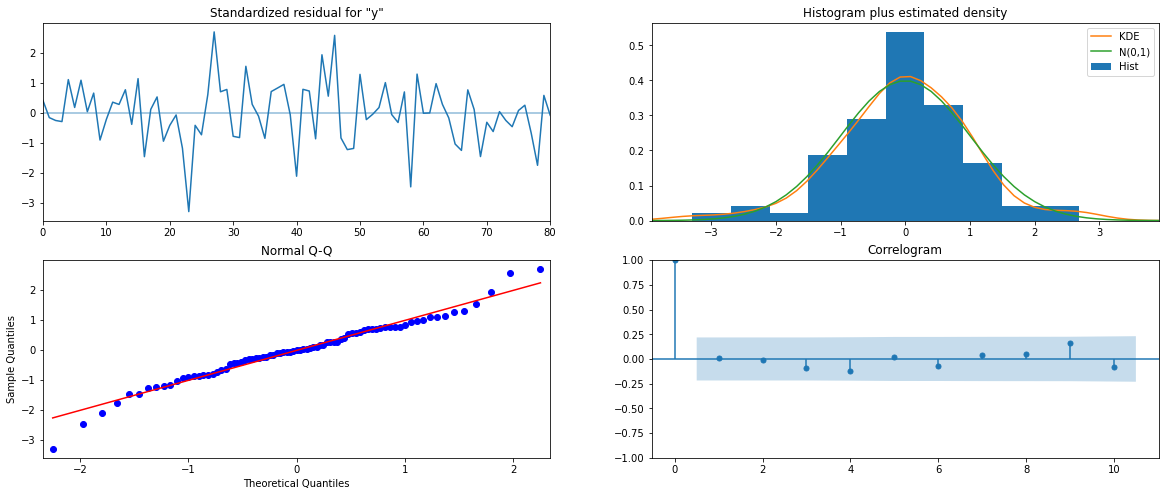

In [189]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [190]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [191]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  50.906035  17.743271      16.129862      85.682208
1  78.310463  17.849848      43.325403     113.295522
2  78.802677  17.868892      43.780293     113.825061
3  77.305151  17.865830      42.288767     112.321534
4  67.657579  17.868096      32.636755     102.678404

In [192]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

33.9869899463896


In [193]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['manual SARIMA(2,1,2)(2,2,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
auto ARIMA(0,1,2)               15.618059
manual ARIMA(2,1,2)             15.354885
auto SARIMA(1,1,2)(2,0,2,6)     26.137059
auto SARIMA(1,0,2)(2,0,2,12)    29.750117
manual SARIMA(2,1,2)(1,1,1,6)   19.040251
manual SARIMA(2,1,2)(2,2,1,12)  33.986990

In [194]:
print('Sorted by RMSE values :','\n',)
resultsDf.sort_values(by=['RMSE'])

Sorted by RMSE values : 



RMSE
manual ARIMA(2,1,2)             15.354885
auto ARIMA(0,1,2)               15.618059
manual SARIMA(2,1,2)(1,1,1,6)   19.040251
auto SARIMA(1,1,2)(2,0,2,6)     26.137059
auto SARIMA(1,0,2)(2,0,2,12)    29.750117
manual SARIMA(2,1,2)(2,2,1,12)  33.986990

#### Building the most optimum model on the Full Data.

In [195]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_slope=0.4,
                                                                 smoothing_seasonal=0.3)

/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/arnab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-195-46212f59f144>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fullmodel1 = ExponentialSmoothing(df,


In [196]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 20.672560612945716


In [197]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=12)

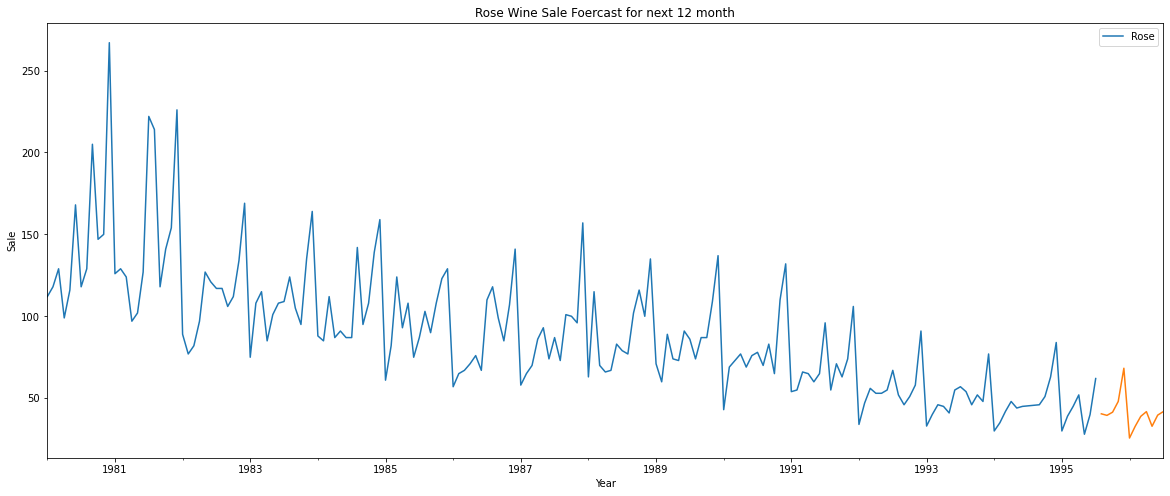

In [198]:
df.plot()
plt.xlabel('Year')
plt.ylabel('Sale')
plt.title('Rose Wine Sale Foercast for next 12 month')
prediction_1.plot();

In [199]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1995-08-31  -0.145494   40.466296   81.078086
1995-09-30  -1.088644   39.523147   80.134937
1995-10-31   0.860741   41.472531   82.084321
1995-11-30   7.399765   48.011555   88.623345
1995-12-31  27.672909   68.284699  108.896489

In [200]:
pred_1_df.tail(12)

lower_CI  prediction    upper_ci
1995-08-31  -0.145494   40.466296   81.078086
1995-09-30  -1.088644   39.523147   80.134937
1995-10-31   0.860741   41.472531   82.084321
1995-11-30   7.399765   48.011555   88.623345
1995-12-31  27.672909   68.284699  108.896489
1996-01-31 -14.925076   25.686715   66.298505
1996-02-29  -7.821432   32.790358   73.402148
1996-03-31  -1.677804   38.933986   79.545776
1996-04-30   1.184573   41.796363   82.408153
1996-05-31  -7.739183   32.872607   73.484397
1996-06-30  -0.945992   39.665798   80.277589
1996-07-31   1.221903   41.833693   82.445483

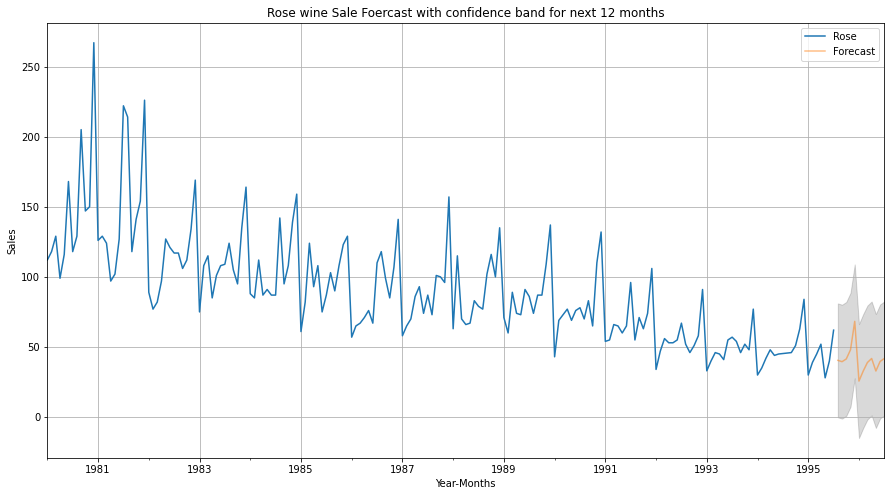

In [201]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.title('Rose wine Sale Foercast with confidence band for next 12 months')
plt.grid()
plt.show()
